# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

from IPython.display import Image
from os import system

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [2]:
# Reading the datafile and viewing the first 5 rows of head and last 5 rows of tail.
df = pd.read_csv("INNHotelsGroup.csv")
data = df.copy()
data.head()


Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

In [3]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

<IPython.core.display.Javascript object>

## The shape of the dataset.

In [4]:
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

* The dataset has 36275 rows and 19 columns.

In [5]:
data[data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are 10275 duplicate values in the dataset. Lets go ahead and drop them.

In [6]:
data.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

## Observations

* Most of the data-types are of int64.
* type_of_meal_plan, room_type_reserved, market_segment_type and booking_status are of object category.
* booking_status is our dependent variable in our dataset.
* Booking_ID is also of object type and we are going to drop it.

In [8]:
# DRopping the Booking_ID
data["Booking_ID"].nunique()

36275

<IPython.core.display.Javascript object>

In [9]:
data.drop(["Booking_ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Summary of the dataset

In [10]:
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

<IPython.core.display.Javascript object>

## Observation
* The maximum count of adults in the dataset is 4.
* The maximum count of children in the dataset is 10 while most of the rows dont have children which means many people have visited the hotel without kids.
* Many of the customers dont require parking space.
* The mean time of the lead_time for the booking is 85 days.
* The dataset contains entries done in the year of 2017 and 2018.
* The mean price of the room is 103 euros while the minimum price is 80 euros and the costliest being 540 euros.

In [11]:
# Printing the all the column names
print(data.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


<IPython.core.display.Javascript object>

## Checking for Categorical columns

In [12]:
cat_columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

## Observations
* The most popular type of meal plan is Meal plan 1 with 27835 entries.
* The most popular type of room type reserved is Room type 1 with 28130 entries.
* The most popular market segment where is the booking of the rooms is done is Online with 23214 entries.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

# 1. What are the busiest months in the hotel?

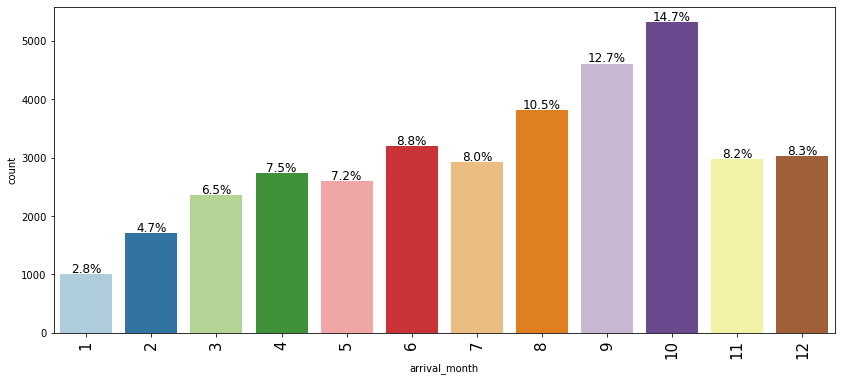

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data, "arrival_month", perc=True)

## Observation
* The busiest months in the hotel are October lying at 14.7 % followed by September coming 12.7 % followed by August being at 10.5 %.
* The least month with less bookings is in january being at 2.8 %.

# 2. Which market segment do most of the guests come from?

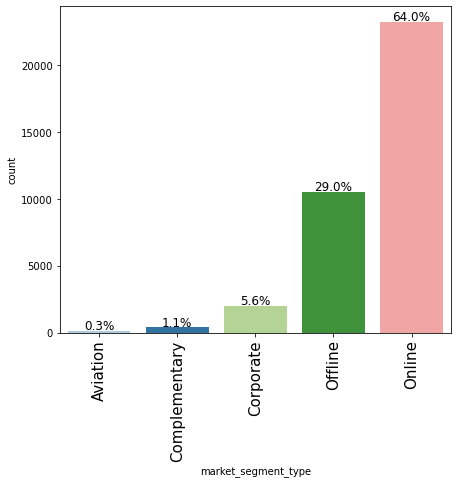

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "market_segment_type", perc=True)

## Observation
* Most of the guests come from Online type of market segment being 64%.

## To find out which market segment of customers stay longest in the hotel 

Text(0, 0.5, 'Number of days')

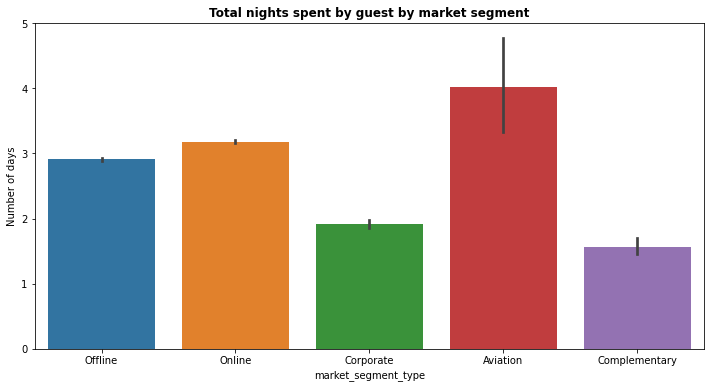

<IPython.core.display.Javascript object>

In [16]:
data["total_stay"] = data["no_of_week_nights"] + data["no_of_weekend_nights"]
plt.figure(figsize=(12, 6))
sns.barplot(x="market_segment_type", y="total_stay", data=data)
plt.title("Total nights spent by guest by market segment", weight="bold")
plt.xlabel("market_segment_type")
plt.ylabel("Number of days")

* The customers of the market segment of Aviation spend more days in the hotel.

# 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [17]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [18]:
# due to many prices, let's bin the costs
data["room_cost_cat"] = pd.cut(
    x=data.avg_price_per_room,
    bins=[-np.infty, 80, 120, np.infty],
    labels=["Standard", "Moderate", "Premium"],
)

data["room_cost_cat"].value_counts()

# Standard = 0 to <80
# Moderate =80 to <120
# Premium >=120

Moderate    18280
Premium      9058
Standard     8937
Name: room_cost_cat, dtype: int64

<IPython.core.display.Javascript object>

market_segment_type  Aviation  Complementary  Corporate  Offline  Online  \
room_cost_cat                                                              
All                       125            391       2017    10528   23214   
Moderate                  121              0        701     5957   11501   
Standard                    4            389       1166     3826    3552   
Premium                     0              2        150      745    8161   

market_segment_type    All  
room_cost_cat               
All                  36275  
Moderate             18280  
Standard              8937  
Premium               9058  
------------------------------------------------------------------------------------------------------------------------


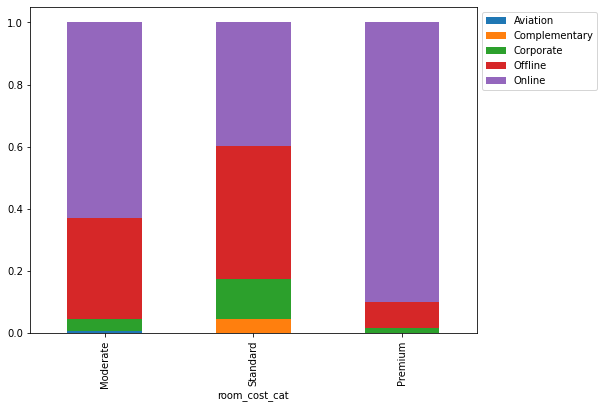

<IPython.core.display.Javascript object>

In [19]:
# room_cost_cat vs market_segment_type
stacked_barplot(data, "room_cost_cat", "market_segment_type")

## Observations
* Since there is a wide range of prices available in the hotel, they categorized to 3 segments of "Standard" ranging from 0 to 80 Euros, "Moderate" ranging from 80 to 120 Euros and "Premimum" being more than 120 Euros.
* Most of the bookings are done in "Moderate" price category with 18280 entries with "Online" customers of 11501 booking for it.
* The second most bookings are done in "Premium" price cateory with 9058 entries also coming from "Online" customers.
* The last being "Standard" price category with 8937 entries with most of the booking coming from "Aviation" market segment.

# 4. What percentage of bookings are canceled?

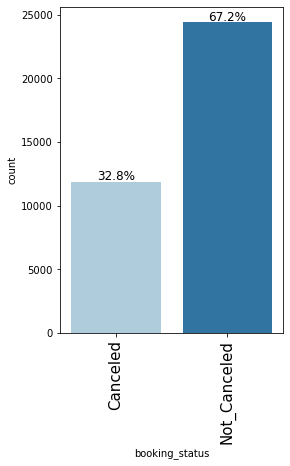

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "booking_status", perc=True)

## Observation
* 67.2 % of the bookings are canceled.

## To see which year had most canceled bookings.

Text(0, 0.5, 'Lead time')

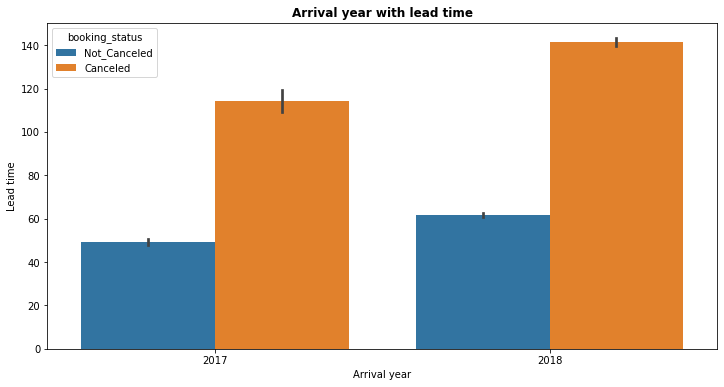

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x="arrival_year", y="lead_time", hue="booking_status", data=data)
plt.title("Arrival year with lead time", weight="bold")
plt.xlabel("Arrival year")
plt.ylabel("Lead time")

* Compared to Year2017, Year2018 had most bookings canceled. 

# 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

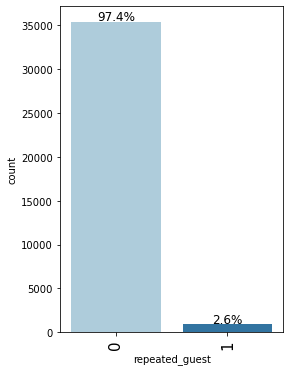

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "repeated_guest", perc=True)

## Observation
* 2.6 % of repeated customers canceled their bookings. 

## Lets find out how repeated guests behave with other variables in the dataset.

repeated_guest           0    1    All
market_segment_type                   
All                  35345  930  36275
Corporate             1415  602   2017
Complementary          265  126    391
Online               23118   96  23214
Offline              10438   90  10528
Aviation               109   16    125
------------------------------------------------------------------------------------------------------------------------


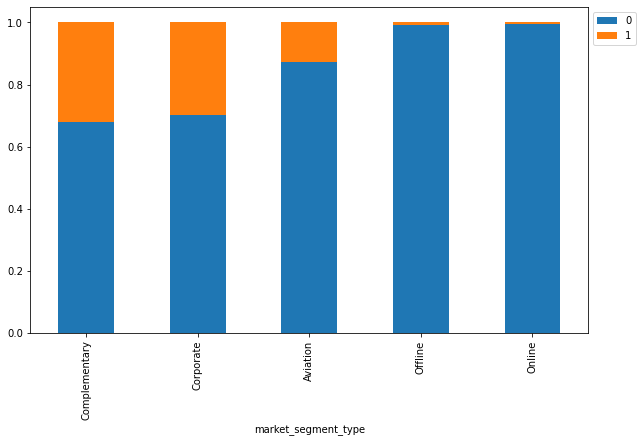

<IPython.core.display.Javascript object>

In [23]:
# market_segment_type vs repeated_guest
stacked_barplot(data, "market_segment_type", "repeated_guest")

repeated_guest      0    1    All
room_cost_cat                    
All             35345  930  36275
Standard         8227  710   8937
Moderate        18082  198  18280
Premium          9036   22   9058
------------------------------------------------------------------------------------------------------------------------


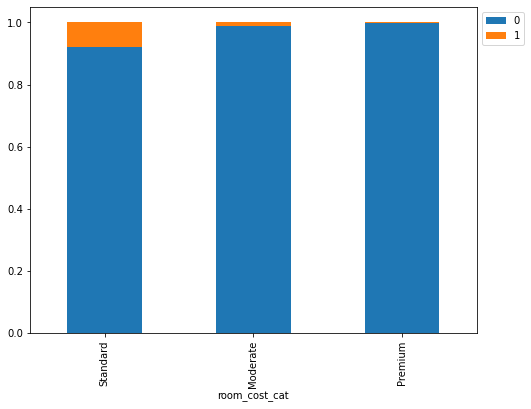

<IPython.core.display.Javascript object>

In [24]:
# room_cost_cat vs repeated_guest

stacked_barplot(data, "room_cost_cat", "repeated_guest")

repeated_guest                  0    1    All
required_car_parking_space                   
All                         35345  930  36275
0                           34360  791  35151
1                             985  139   1124
------------------------------------------------------------------------------------------------------------------------


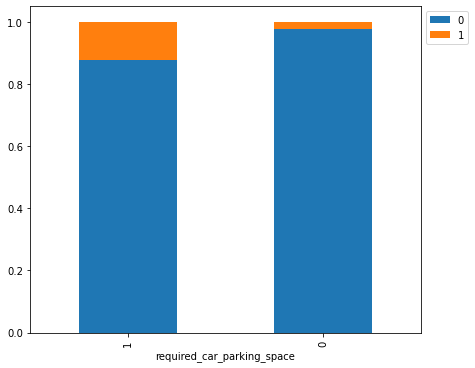

<IPython.core.display.Javascript object>

In [25]:
# required_car_parking_space vs repeated_guest

stacked_barplot(data, "required_car_parking_space", "repeated_guest")

* Repeated guest are very less compared to the customers who came once.
* Most of the re4peated customers came from "Corporate" market type of segment.
* Repeated customers also booked "Standard" category for the price of the room. So repeated customers dont like spending a lot of money.
* Repeated customers did prefer parking space in the hotel.

# 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


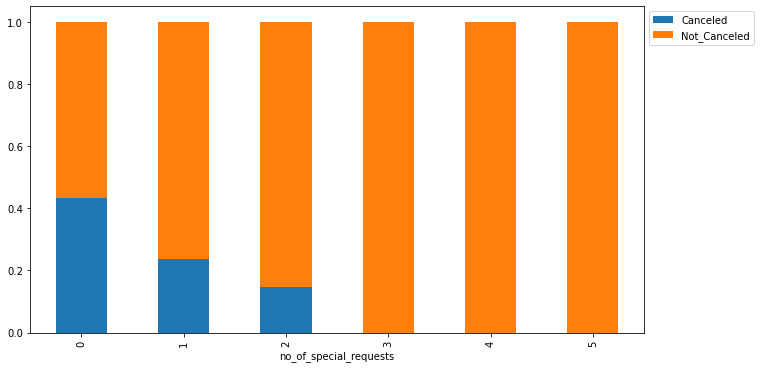

<IPython.core.display.Javascript object>

In [26]:
# no_special_requests vs booking_status

stacked_barplot(data, "no_of_special_requests", "booking_status")

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


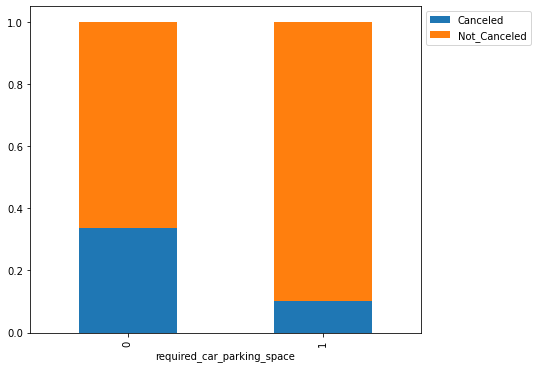

<IPython.core.display.Javascript object>

In [27]:
# required_car_parking_space vs booking_status

stacked_barplot(data, "required_car_parking_space", "booking_status")

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


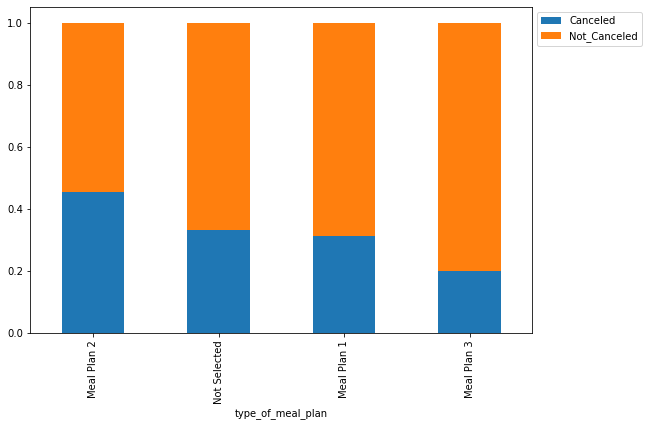

<IPython.core.display.Javascript object>

In [28]:
# type_of_meal_plan vs booking_status

stacked_barplot(data, "type_of_meal_plan", "booking_status")

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


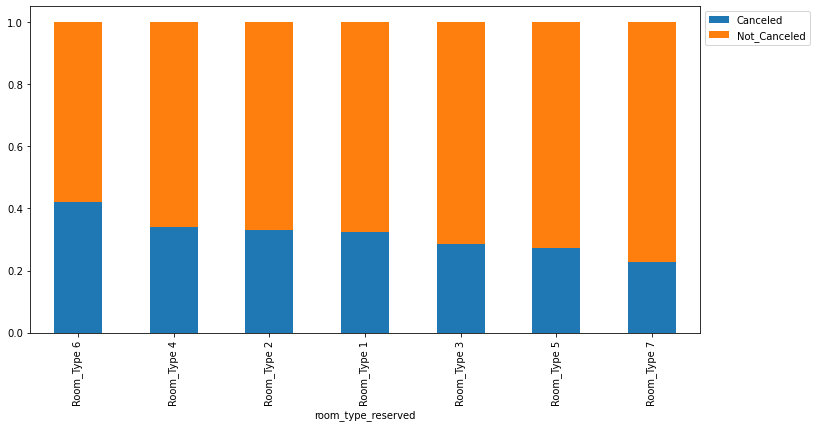

<IPython.core.display.Javascript object>

In [29]:
# room_type_reserved vs booking_status

stacked_barplot(data, "room_type_reserved", "booking_status")

## Observation
* Most of the customers who canceled their booking had no special requirements.
* Customers who had the most number of special requests did not cancel their stay.
* So no of special request did not have any major impact for cancellation.
* Customers who canceled because of parking space were less compared to customers who did not cancel cos of parking space. So parking space doesnt affect the cancellation.
* Customers who canceled more with the meal type was Meal type 2.
* Customers with room type of 6, 4 ,2 and 1 canceled more. 

## More EDA

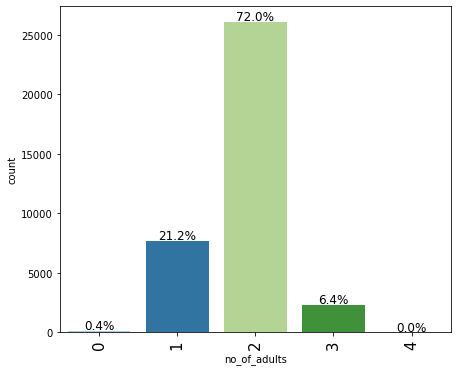

<IPython.core.display.Javascript object>

In [30]:
# Observation of no_of_adults

labeled_barplot(data, "no_of_adults", perc=True)

* 72 % of the time the no. of adults who checked in were 2.

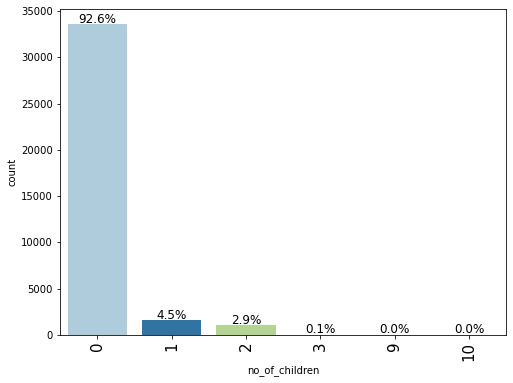

<IPython.core.display.Javascript object>

In [31]:
# Observation on no_of_children

labeled_barplot(data, "no_of_children", perc=True)

* 92.6 % of the customers had no children with them.

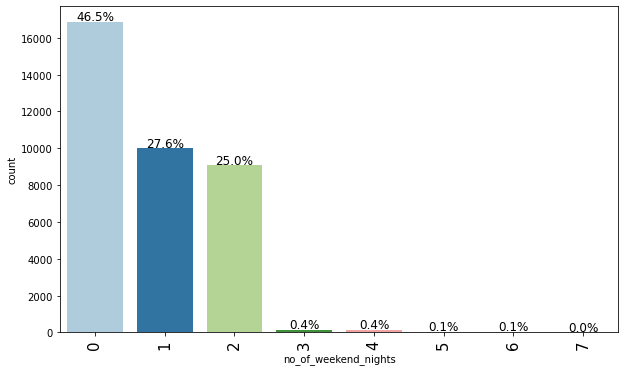

<IPython.core.display.Javascript object>

In [32]:
# Observation on no_of_weekend_nights

labeled_barplot(data, "no_of_weekend_nights", perc=True)

* 46.5% of weekends, the customers did not stay, that means customers did not just come for the weekend.

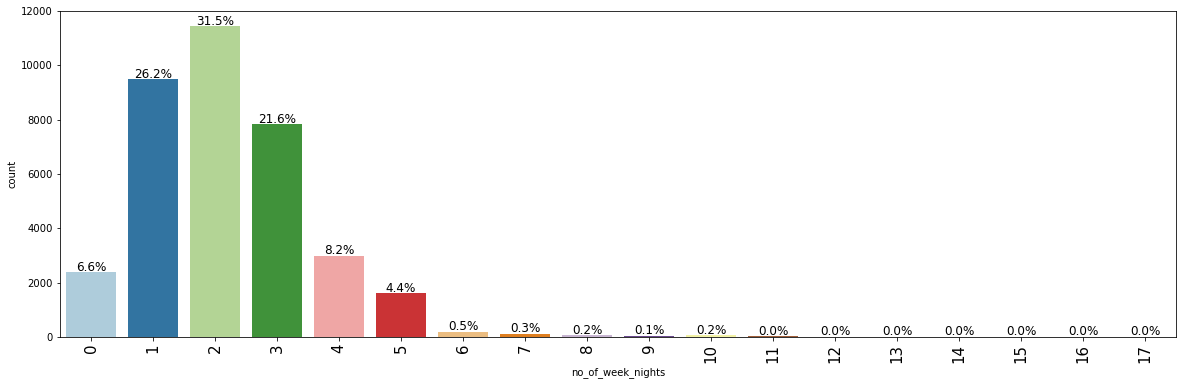

<IPython.core.display.Javascript object>

In [33]:
# Observation on no_of_week_nights

labeled_barplot(data, "no_of_week_nights", perc=True)

* 31.5% of the time, the customers stayed for 2 days followed by 26.2%, the customers stayed for a day. 

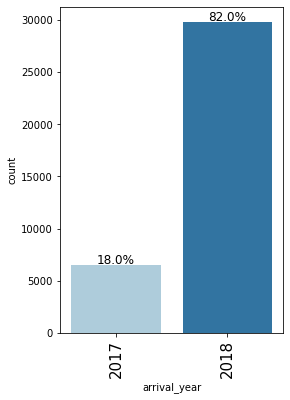

<IPython.core.display.Javascript object>

In [34]:
# Observation on arrival_year

labeled_barplot(data, "arrival_year", perc=True)

* Most of the customers came in the Year 2018.

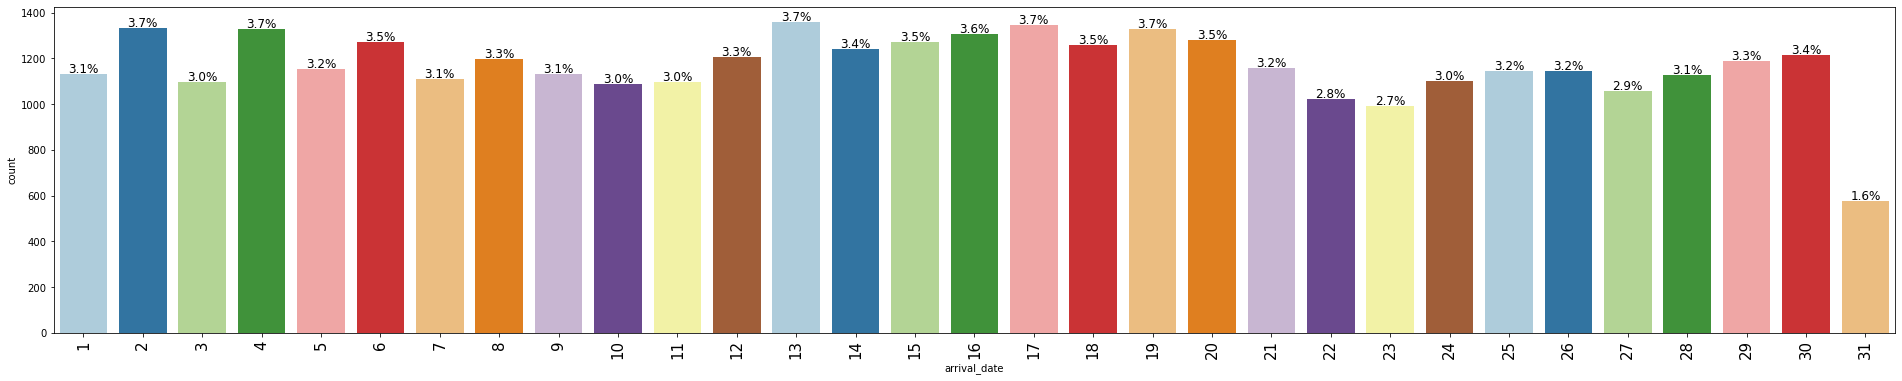

<IPython.core.display.Javascript object>

In [35]:
# Observation on arrival_date

labeled_barplot(data, "arrival_date", perc=True)

* The arrival dates are almost evenly distributed.

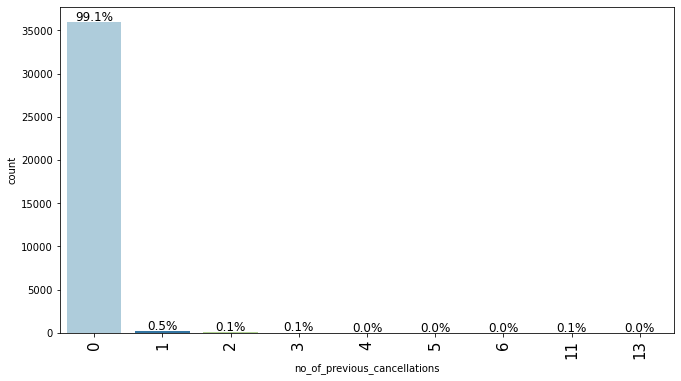

<IPython.core.display.Javascript object>

In [36]:
# Observation on no_of_previous_cancellations

labeled_barplot(data, "no_of_previous_cancellations", perc=True)

* Most of the customers did not have previous cancellations.

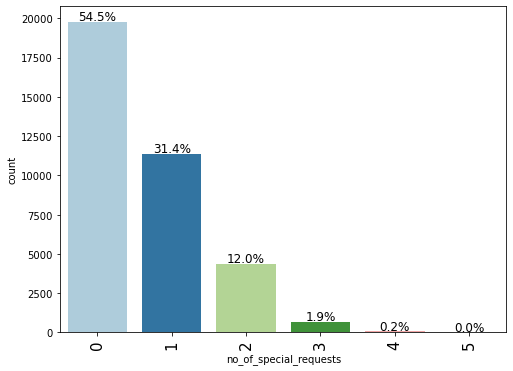

<IPython.core.display.Javascript object>

In [37]:
# Observation on no_of_special_requests

labeled_barplot(data, "no_of_special_requests", perc=True)

* 54.5% of the time, the customers had no special request.

In [38]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

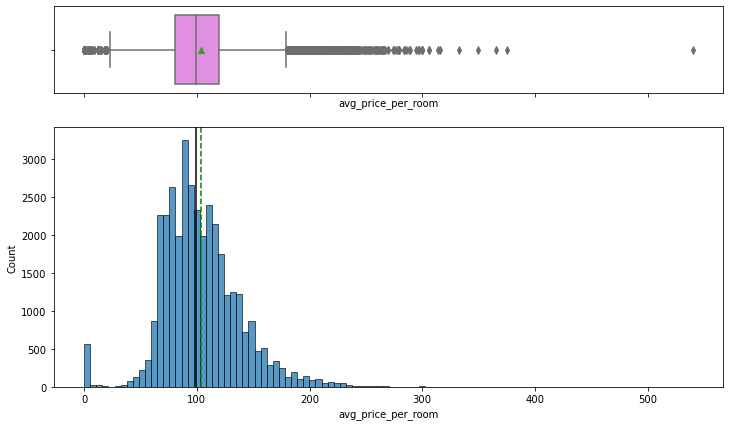

<IPython.core.display.Javascript object>

In [39]:
# Observation on avg_price_per_room

histogram_boxplot(data, "avg_price_per_room", bins=100)

* The average price of the room is 103 euros with the maximum being at 540 euros.
* However there are many outliers in this variable.
##  booking_status vs lead_time

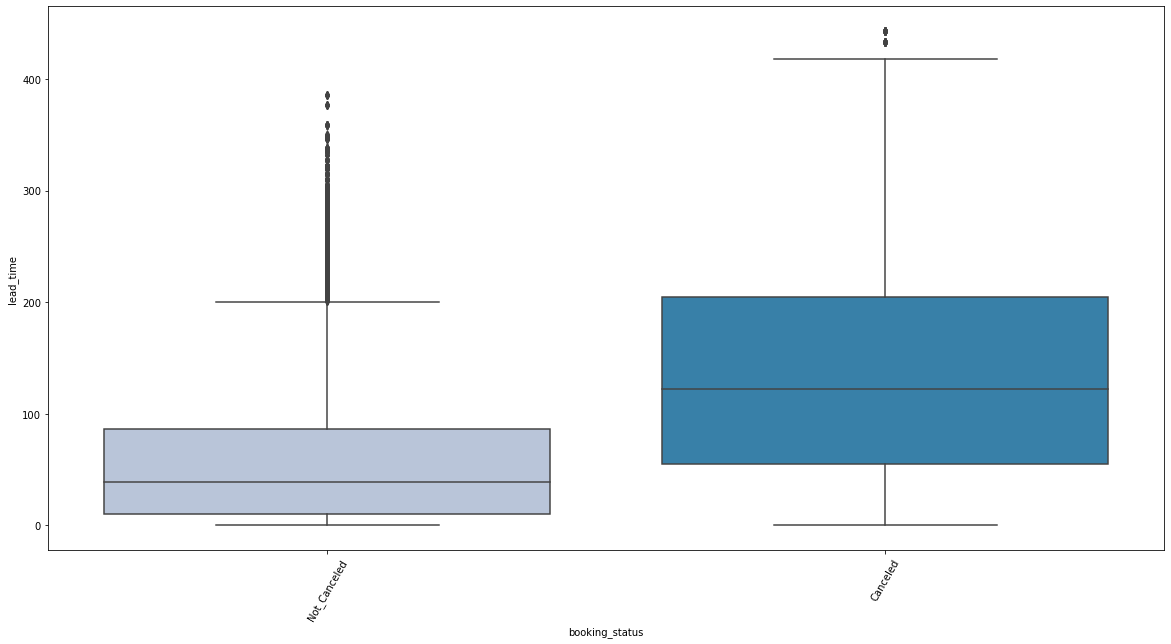

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(20, 10))
bn = sns.boxplot(x="booking_status", y="lead_time", data=data, palette="PuBu")
plt.xticks(rotation=60)
plt.show()

* Customers with more lead time canceled their booking with the mean time being 120 days.
* We have more outliers with the lead time with the customerts who did not cancel.

In [41]:
# due to many lead time, let's bin the lead time
data["lead_time_bins"] = pd.cut(
    x=data.lead_time,
    bins=[-np.infty, 17, 57, 126, np.infty],
    labels=["Short", "Moderate", "High", "Extreme"],
)

data["lead_time_bins"].value_counts()

# Short 25th = 0 to <17
# Moderate 50th = 17 to <57
# High 75th = 57 to to <126
# Extreme = 126 to infinity

Short       9226
Extreme     9058
High        9015
Moderate    8976
Name: lead_time_bins, dtype: int64

<IPython.core.display.Javascript object>

* We observed that a longer lead time means that the chances of cancellation are higher, let us see if any of the other variables indicate higher a lead time.
## Correlation Map

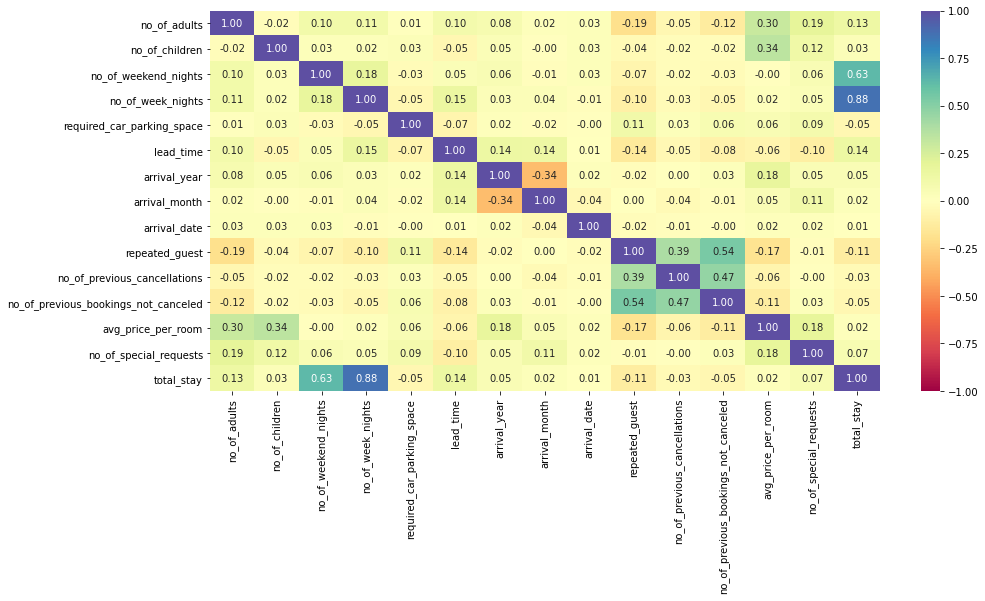

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Observation
* There is a high corelation between no of weekends night, no of weeknights with total stay. They are highly related.
* There is high correlation between price of the room with no of children and no of adults too.
* There is no correlation between arrival month and repeated customers.
## Bivariate Analysis

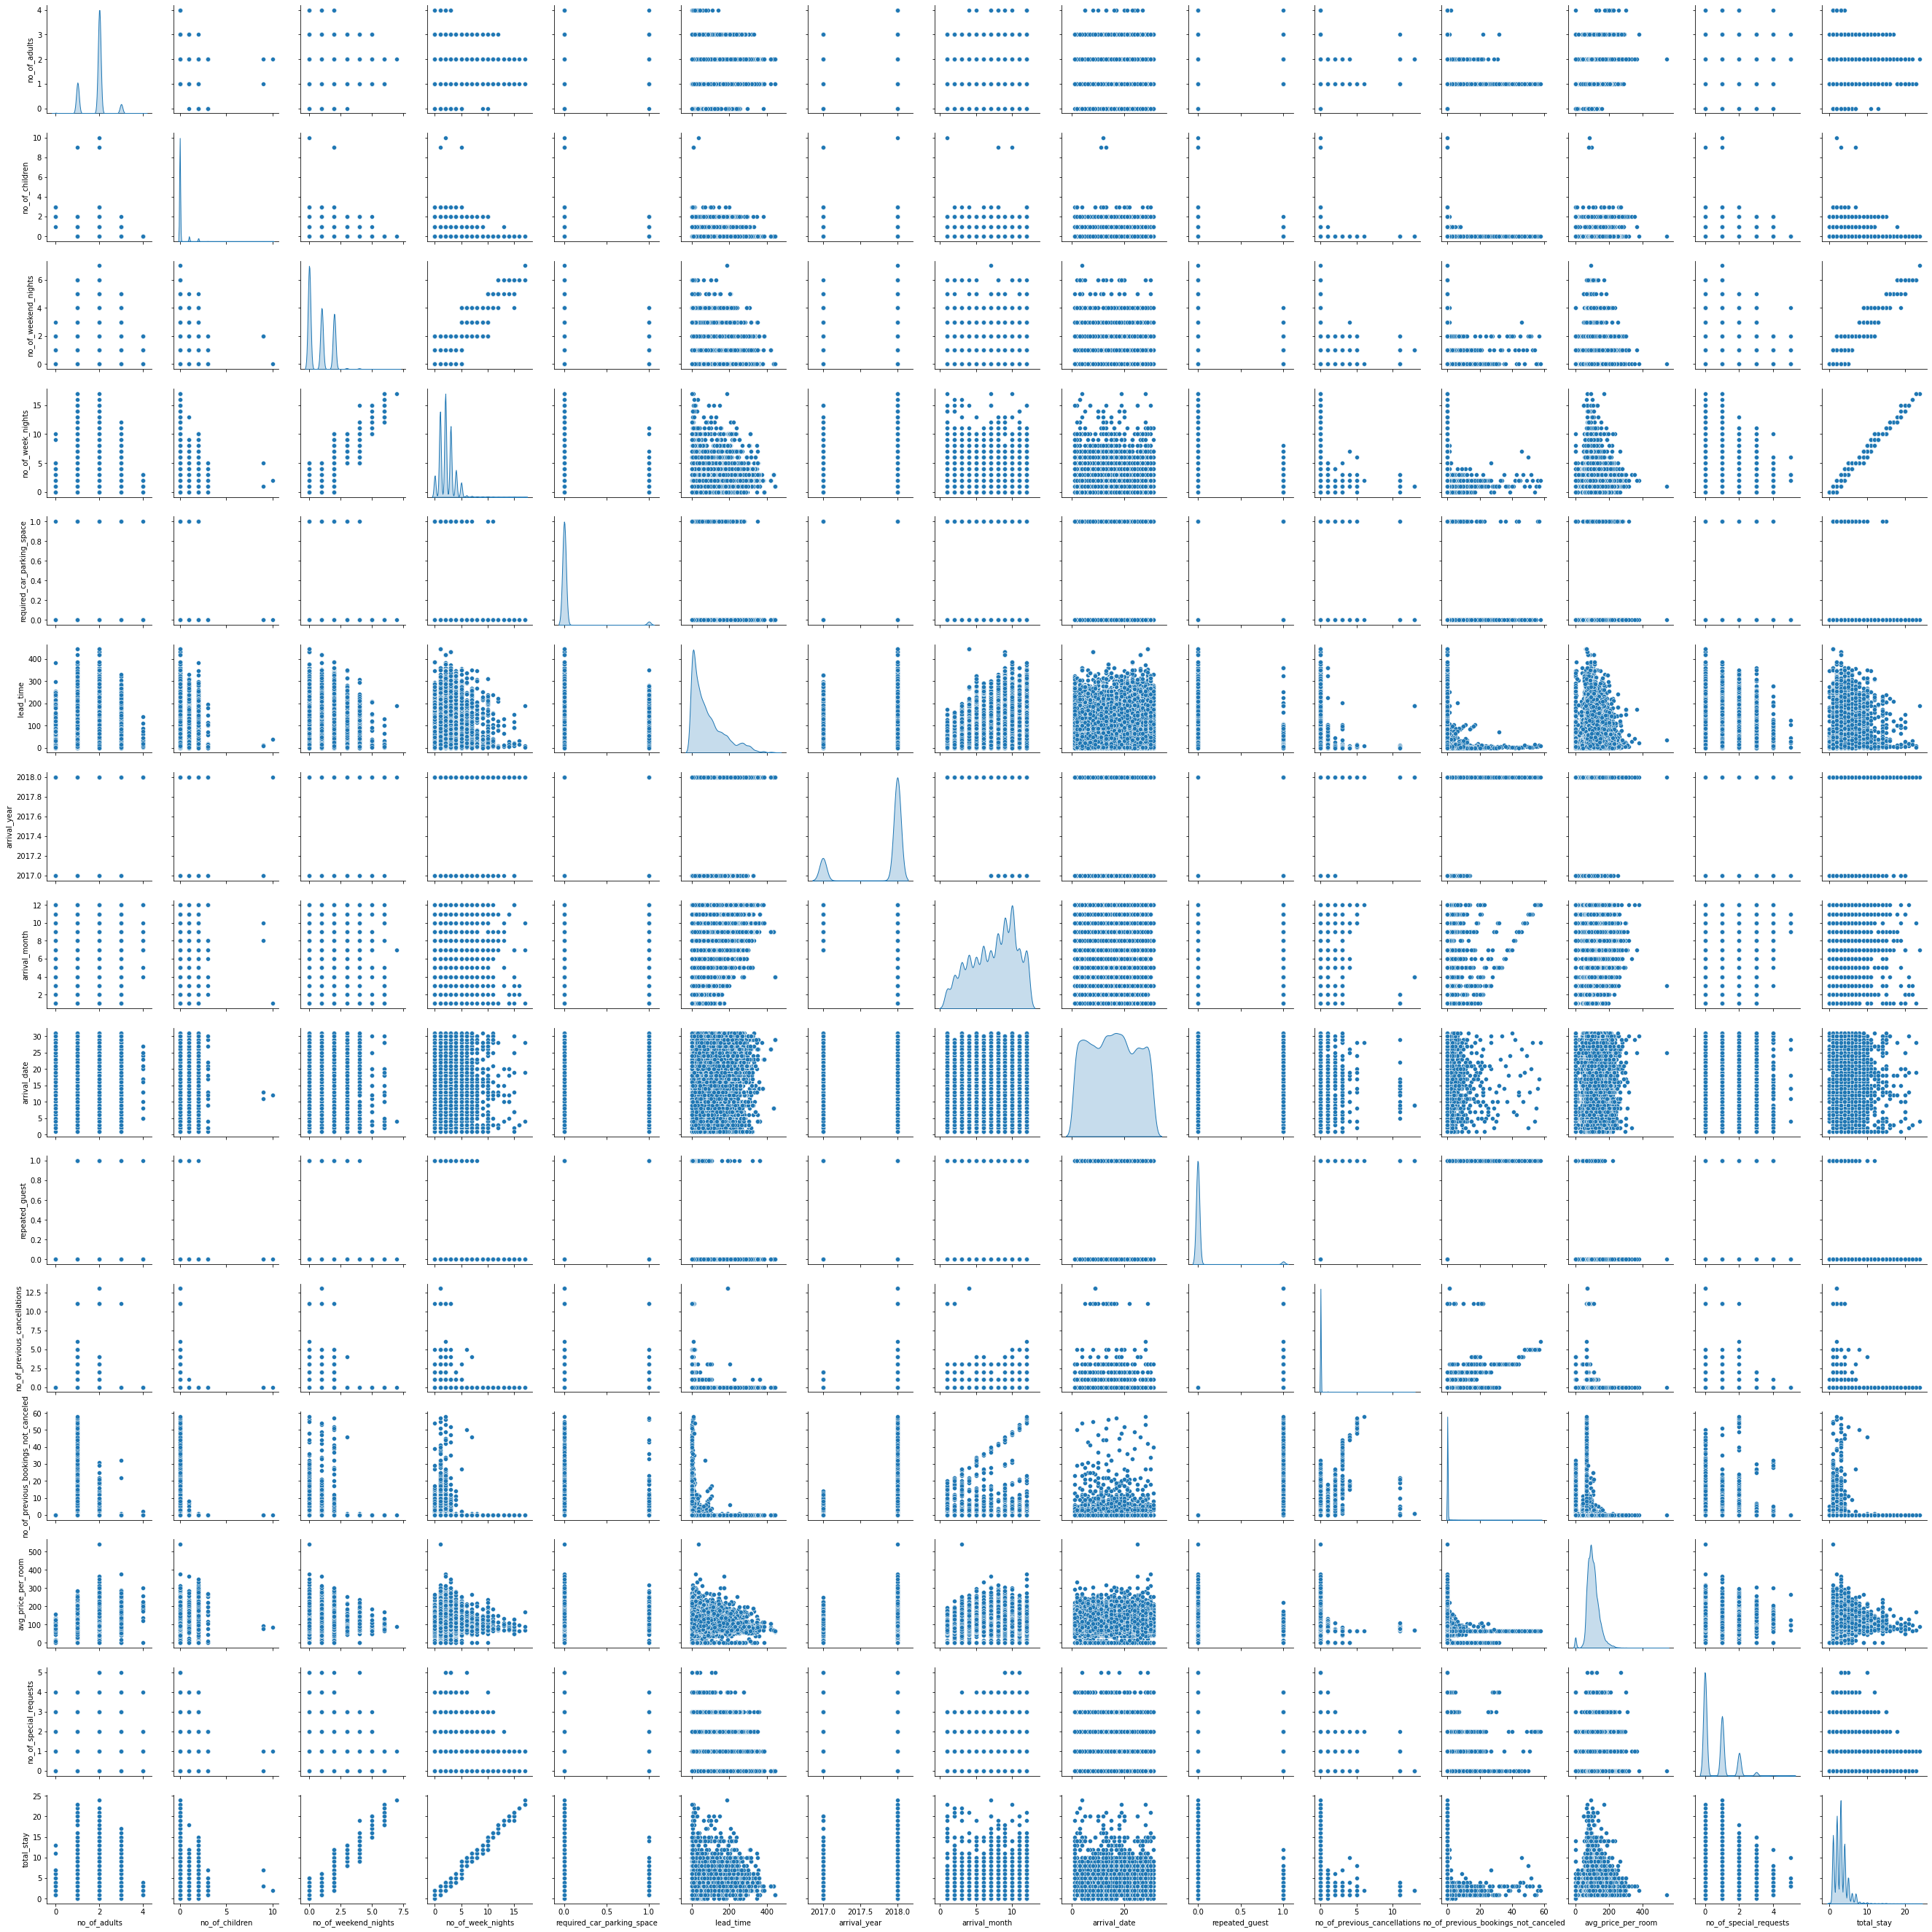

<IPython.core.display.Javascript object>

In [43]:
sns.pairplot(data, diag_kind="kde")

In [44]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

## Weekend nights vs Booking status

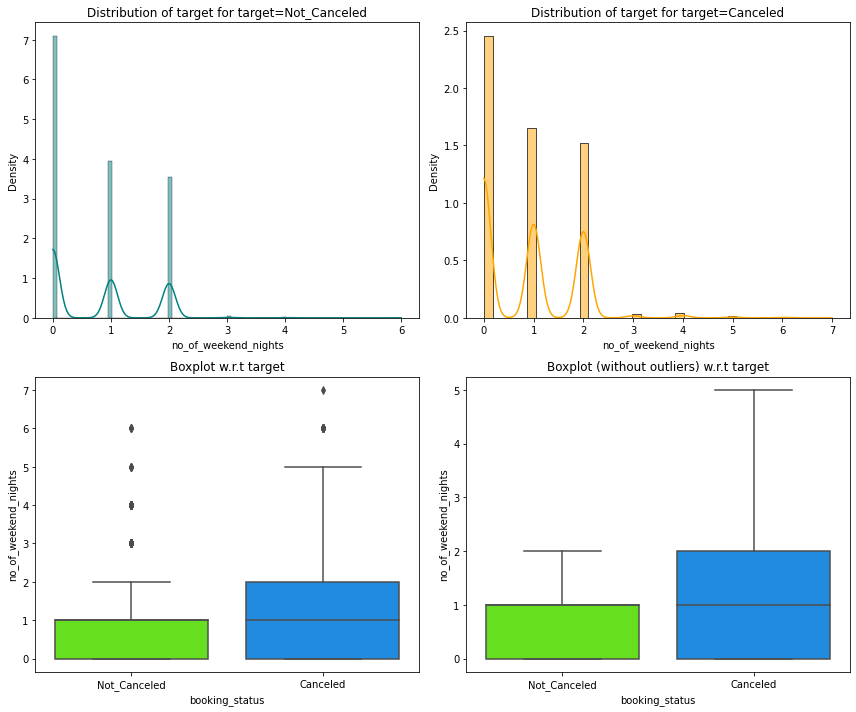

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(data, "no_of_weekend_nights", "booking_status")

* The distribution is right skewed with weekend nights of not canceled and canceled.
* A lot of customers canceled on weekends compared to customers who did not cancel.
## Weeknights vs Booking status

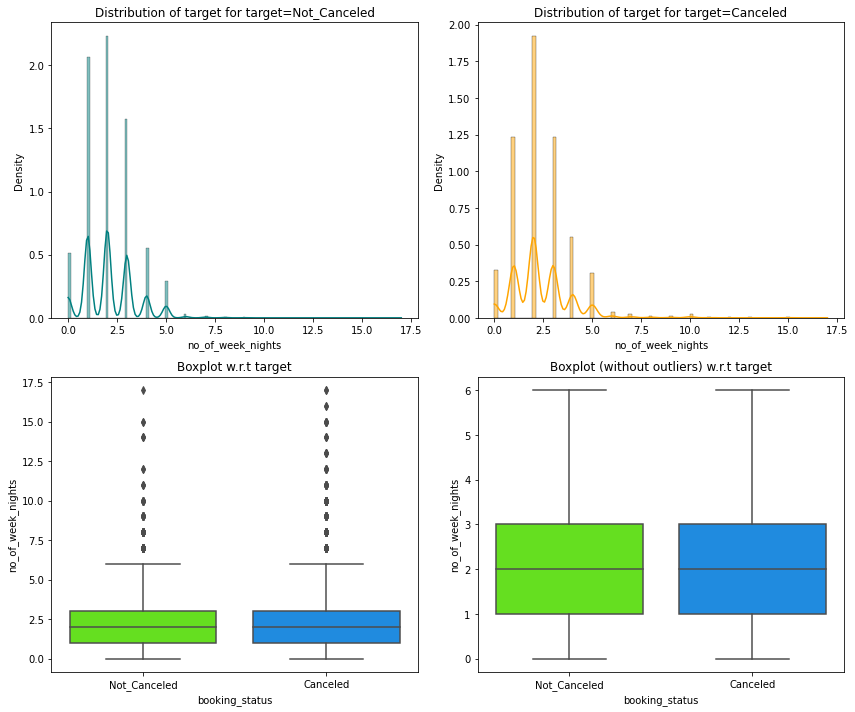

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(data, "no_of_week_nights", "booking_status")

* The distribution of no of week nights is right skewed.
* there are many outliers for customers who have not canceled.
## Lead time vs Booking status

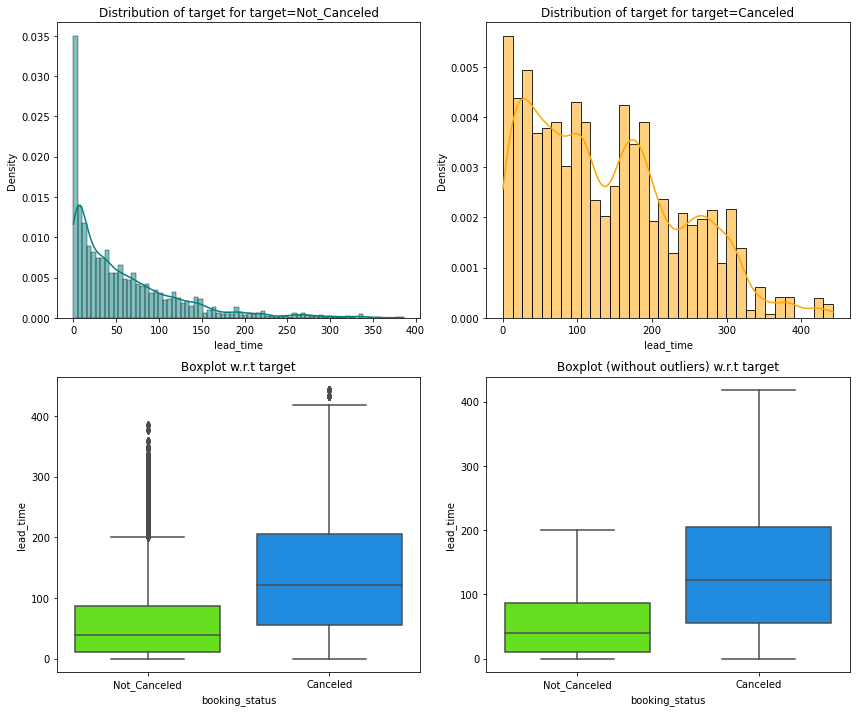

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* The distribution for lead time is right skewed,however more customers have with higher lead time.
## Arrival month vs Booking status

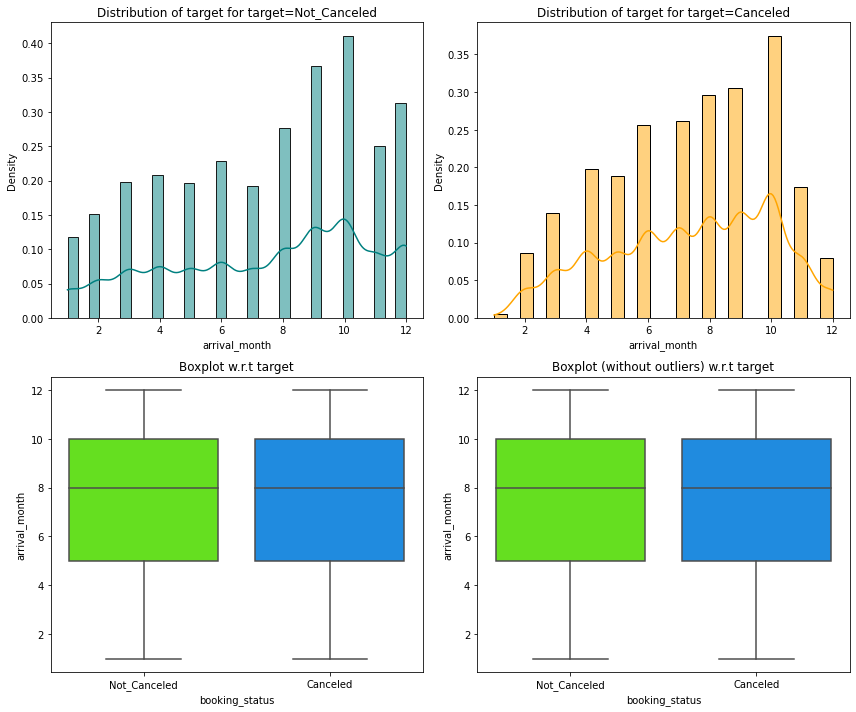

<IPython.core.display.Javascript object>

In [48]:
distribution_plot_wrt_target(data, "arrival_month", "booking_status")

* The distribution for arrival month is slightly left skewed.
## Price of the room vs Booking status

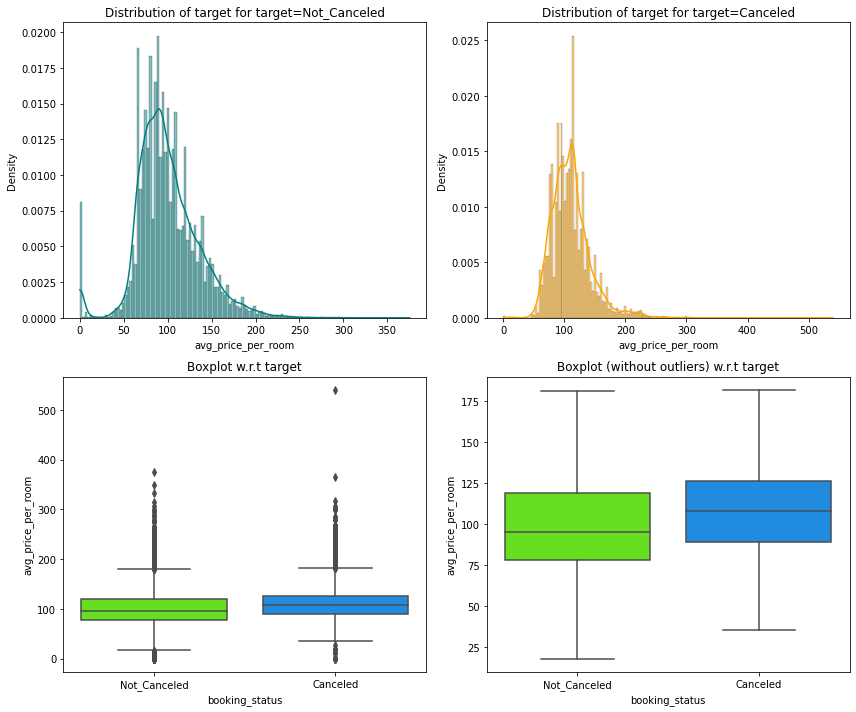

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The distribution of price of the room is normally distributed.
* There is not much difference in customers cancelling because of price. We have equal no of customers cancelling for range of price of room.
More analysis must be done on this.
## No of special request vs Booking status

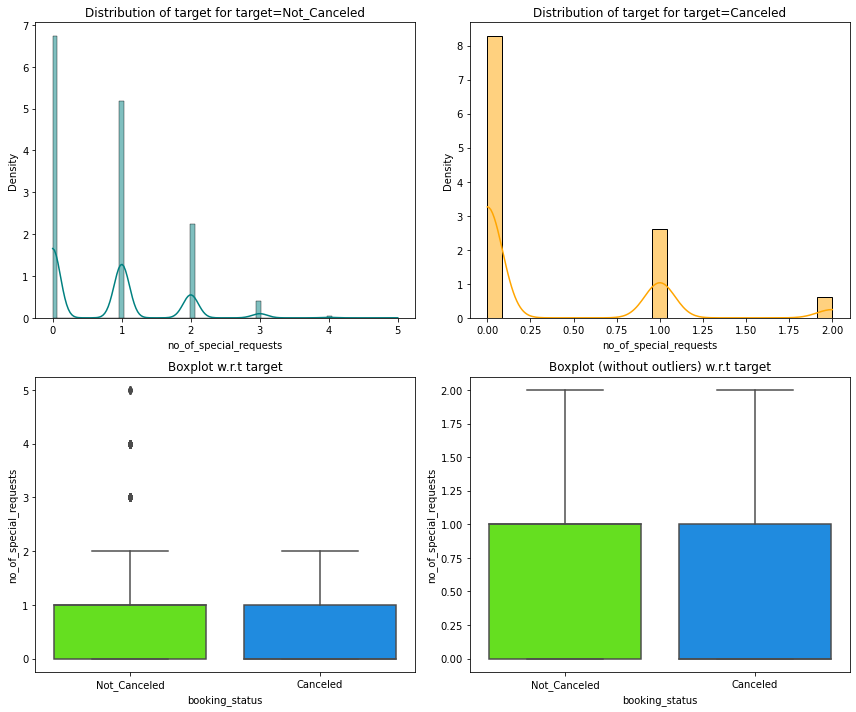

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(data, "no_of_special_requests", "booking_status")

## Summary of EDA
### Data Description
* The maximum count of adults in the dataset is 4.
* The maximum count of children in the dataset is 10 while most of the rows dont have children which means many people have visited the hotel without kids.
* Many of the customers dont require parking space.
* The mean time of the lead_time for the booking is 85 days.
* The dataset contains entries done in the year of 2017 and 2018.
* The mean price of the room is 103 euros while the minimum price is 80 euros and the costliest being 540 euros.

### Observation from EDA
* The busiest months for the hotel is from august to october with october being the busiest at 14.7 %.
* Most of the customers booked online with 64%.
* 97% of the guests were first time visitors. So the hotel must be a tourist spot.
* 67% of customers canceled their booking.
* 92.6% of customers had no children with them.
* More customers canceled of high lead time.
* 72% of adults who made their bookings were a pair of adults.
* Meal plan 2 was not a popular choice, more customers canceled with that meal plan.
* Parking space did not affect the cancellation.
* Most of the customers who canceled had no special request.
* Most of repeated customers were from corporate market segment while customers from aviation background stayed longest in the hotel.
* 2.6% of repeated customers canceled.
* There were more cancellations in 2018.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## Checking for missing values

In [51]:
data.isnull().sum().sort_values(ascending=False)

no_of_adults                            0
market_segment_type                     0
room_cost_cat                           0
total_stay                              0
booking_status                          0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
arrival_date                            0
no_of_children                          0
arrival_month                           0
arrival_year                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
lead_time_bins                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset.
## Data Preparation

In [52]:
df1 = data.copy()

<IPython.core.display.Javascript object>

In [53]:
cat_feature = [feature for feature in df1.columns if df1[feature].dtype == "object"]
print("Number of Categorical Features are :", len(cat_feature))

Number of Categorical Features are : 4


<IPython.core.display.Javascript object>

In [54]:
df1[cat_feature][:5]

type_of_meal_plan room_type_reserved market_segment_type booking_status
0       Meal Plan 1        Room_Type 1             Offline   Not_Canceled
1      Not Selected        Room_Type 1              Online   Not_Canceled
2       Meal Plan 1        Room_Type 1              Online       Canceled
3       Meal Plan 1        Room_Type 1              Online       Canceled
4      Not Selected        Room_Type 1              Online       Canceled

<IPython.core.display.Javascript object>

In [55]:
for feature in cat_feature:
    print("{} : {}".format(feature, len(df1[feature].unique())))

type_of_meal_plan : 4
room_type_reserved : 7
market_segment_type : 5
booking_status : 2


<IPython.core.display.Javascript object>

In [56]:
df1["type_of_meal_plan"].replace("Undefined", "SC", inplace=True)

<IPython.core.display.Javascript object>

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['type_of_meal_plan'] = le.fit_transform(df1['type_of_meal_plan'])
df1['room_type_reserved'] = le.fit_transform(df1['room_type_reserved'])
df1['market_segment_type'] = le.fit_transform(df1['market_segment_type'])


<IPython.core.display.Javascript object>

In [58]:
df1.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  3                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  3                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   
2          1          2018              2            28                    4   
3        211          2018              5            20                    4   
4         48          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  total_stay room_cost_cat  \
0                       0   Not_Canceled           3      Standard   
1                       1   Not_Canceled           5      Moderate   
2                       0       Canceled           3      Standard   
3                       0       Canceled           2      Moderate   
4                       0       Canceled           2      Moderate   

  lead_time_bins  
0        Extreme  
1          Short  
2          Short  
3        Extreme  
4       Moderate

<IPython.core.display.Javascript object>

## Outliers Detection and treatment

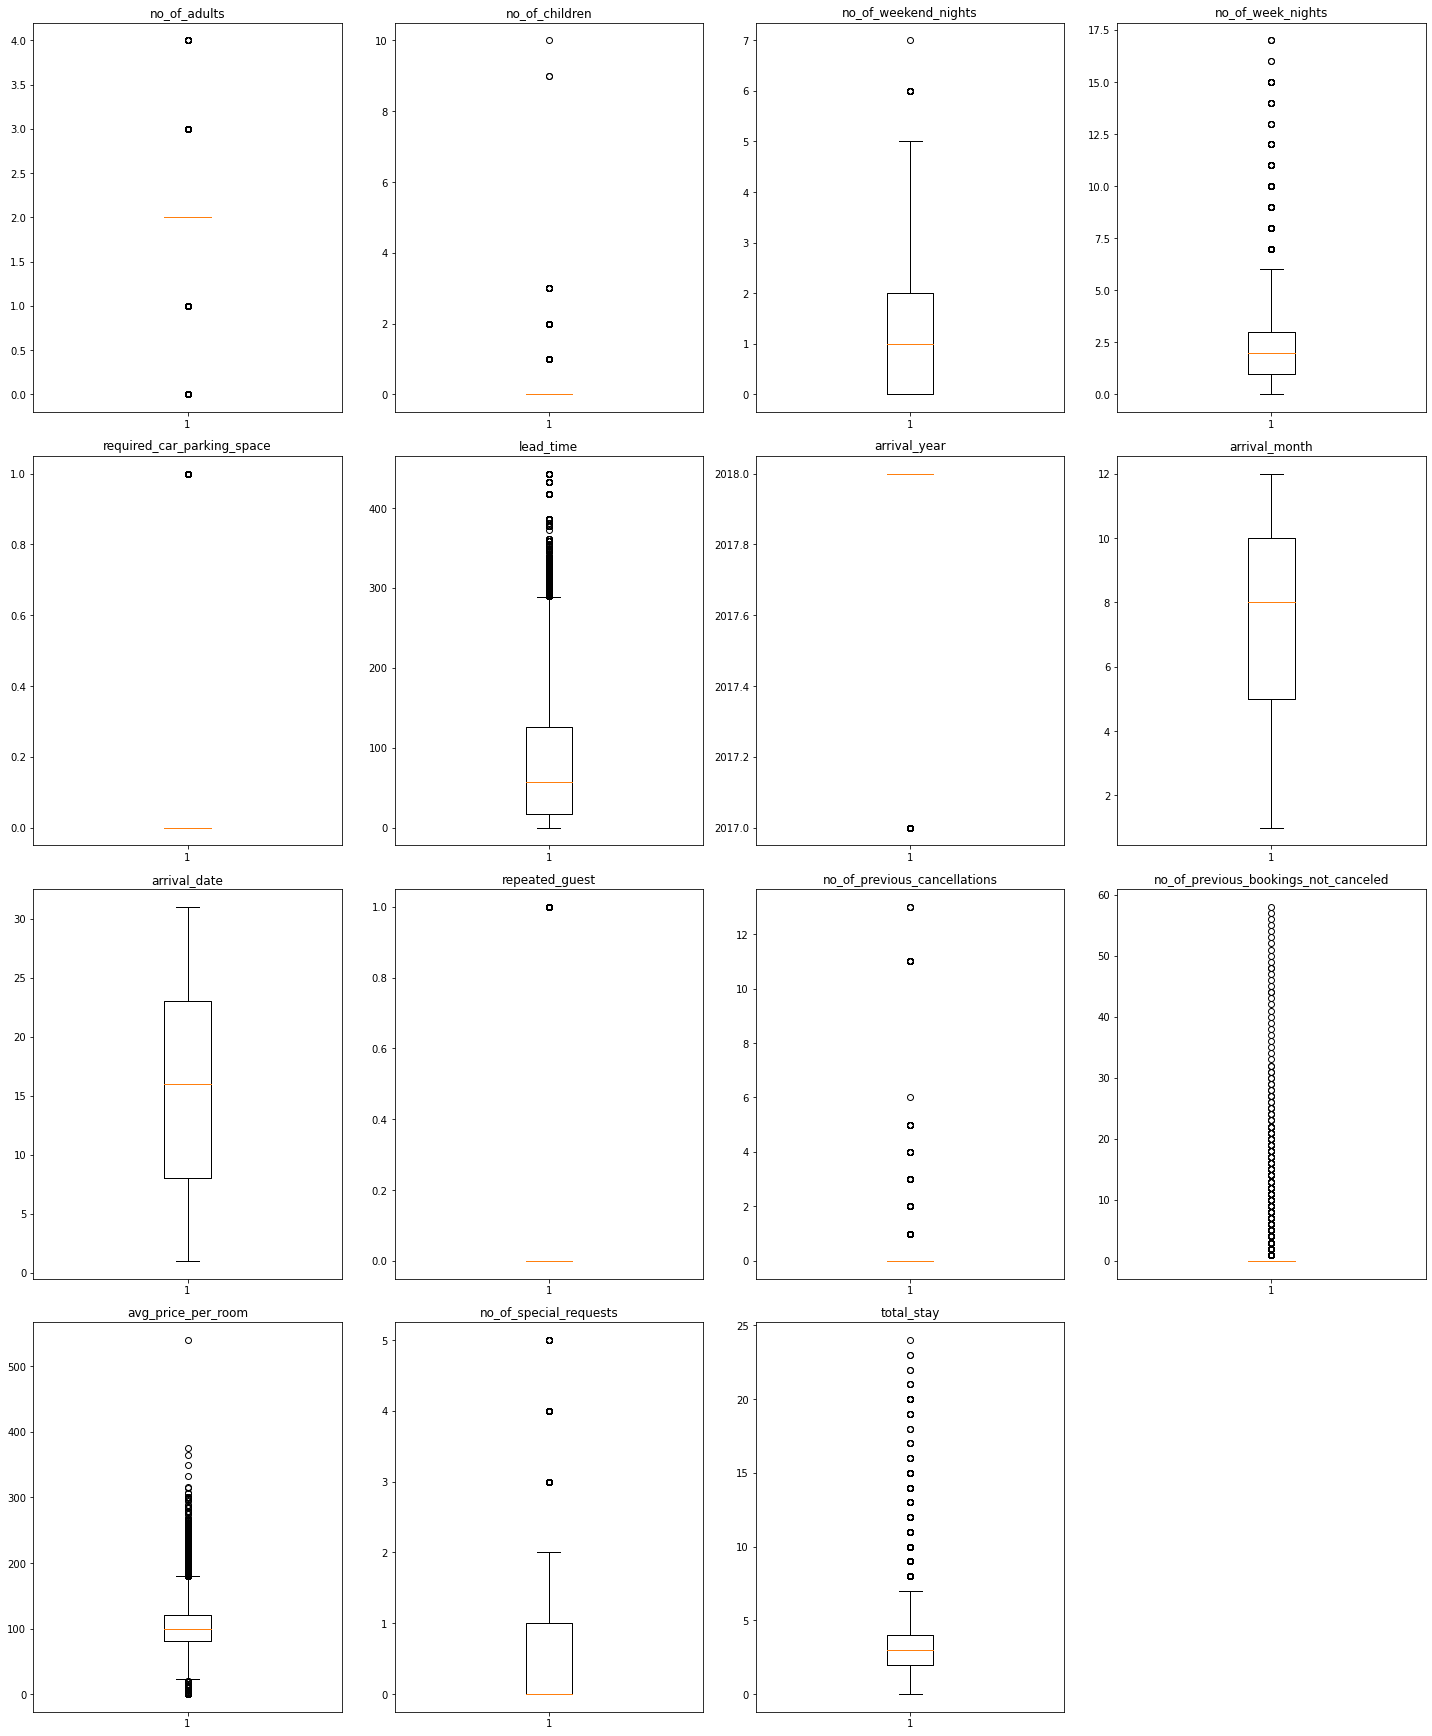

<IPython.core.display.Javascript object>

In [59]:
# let's plot the boxplots of all numerical columns to check for outliers
plt.figure(figsize=(20, 30))

for i, var in enumerate(data.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

* There are a lot of outliers, treating it would lead to loss of data.
## EDA

- It is a good idea to explore the data once again after manipulating it.

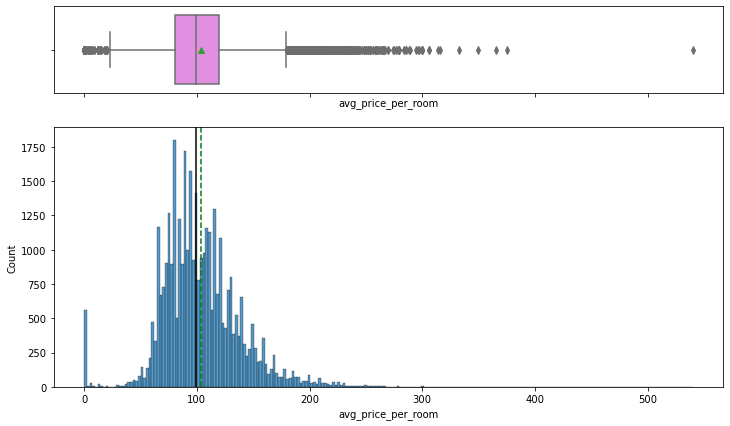

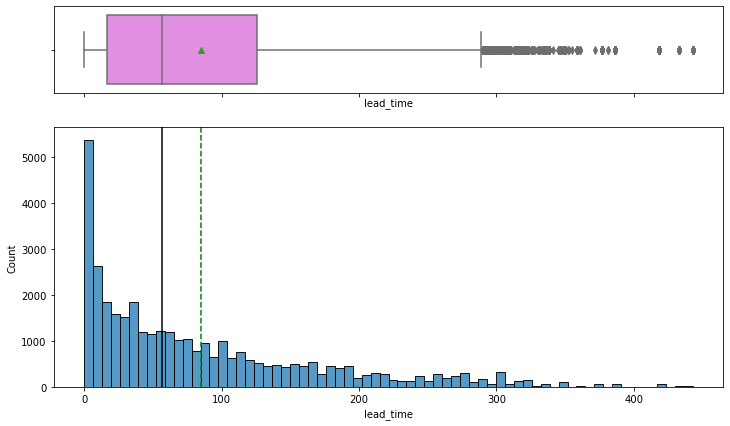

<IPython.core.display.Javascript object>

In [60]:
for col in ["avg_price_per_room", "lead_time"]:
    histogram_boxplot(data, col)

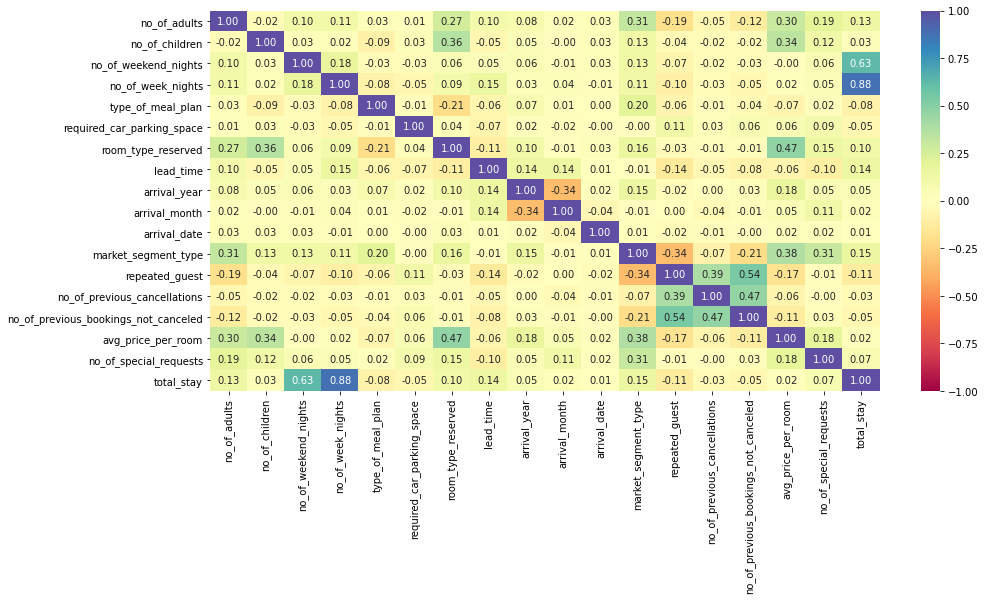

<IPython.core.display.Javascript object>

In [61]:
# Looking at the correlations
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()


# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
# plt.show()

plt.savefig("heat_map", dpi=300, bbox_inches="tight")

## Building a Logistic Regression model

In [62]:
# Encoding our dependent variable booking_status = Not_Canceled as 0 and Canceled as 1
df1["booking_status"] = df1["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

<IPython.core.display.Javascript object>

In [63]:
# defining X and y variables
X = df1.drop(["booking_status"], axis=1)
y = df1["booking_status"]
# view independent variables
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  3                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  3                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   
2          1          2018              2            28                    4   
3        211          2018              5            20                    4   
4         48          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  total_stay room_cost_cat lead_time_bins  
0                       0           3      Standard        Extreme  
1                       1           5      Moderate          Short  
2                       0           3      Standard          Short  
3                       0           2      Moderate        Extreme  
4                       0           2      Moderate       Moderate

<IPython.core.display.Javascript object>

In [64]:
# view dependent variables
y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

## Objective
**We want to predict the booking status. Thus booking_status is the dependent variable.

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check it's performance.

In [65]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  3                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  3                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   
2          1          2018              2            28                    4   
3        211          2018              5            20                    4   
4         48          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  total_stay  room_cost_cat_Moderate  \
0                       0           3                       0   
1                       1           5                       1   
2                       0           3                       0   
3                       0           2                       1   
4                       0           2                       1   

   room_cost_cat_Premium  lead_time_bins_Moderate  lead_time_bins_High  \
0                      0                        0                    0   
1                      0                        0                    0   
2                      0                        0                    0   
3                      0                        0                    0   
4                      0                        1                    0   

   lead_time_bins_Extreme  
0                       1  
1                       0  
2                       0  
3                       1  
4                       0

<IPython.core.display.Javascript object>

In [66]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
# check shape of the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


<IPython.core.display.Javascript object>

In [67]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [68]:
# To measure of colinearity among predictor variables within a multiple regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

### Let's check VIF (Variance Inflation Factor) in the Training data.

In [69]:
# Check VIF (Variance Inflation Factor) in the Training data.
checking_vif(X_train)

feature        VIF
0                           no_of_adults  18.036707
1                         no_of_children   1.365725
2                   no_of_weekend_nights        inf
3                      no_of_week_nights        inf
4                      type_of_meal_plan   1.423465
5             required_car_parking_space   1.070450
6                     room_type_reserved   1.979669
7                              lead_time  12.238806
8                           arrival_year  61.346886
9                          arrival_month   7.222832
10                          arrival_date   4.216200
11                   market_segment_type  44.957359
12                        repeated_guest   1.719609
13          no_of_previous_cancellations   1.391234
14  no_of_previous_bookings_not_canceled   1.651631
15                    avg_price_per_room  39.726701
16                no_of_special_requests   1.935322
17                            total_stay        inf
18                room_cost_cat_Moderate   5.097389
19                 room_cost_cat_Premium   7.549074
20               lead_time_bins_Moderate   2.298891
21                   lead_time_bins_High   3.583085
22                lead_time_bins_Extreme  10.840082

<IPython.core.display.Javascript object>

In [70]:
# VIF in the Training data.
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                            18.036707
no_of_children                           1.365725
no_of_weekend_nights                          inf
no_of_week_nights                             inf
type_of_meal_plan                        1.423465
required_car_parking_space               1.070450
room_type_reserved                       1.979669
lead_time                               12.238806
arrival_year                            61.346886
arrival_month                            7.222832
arrival_date                             4.216200
market_segment_type                     44.957359
repeated_guest                           1.719609
no_of_previous_cancellations             1.391234
no_of_previous_bookings_not_canceled     1.651631
avg_price_per_room                      39.726701
no_of_special_requests                   1.935322
total_stay                                    inf
room_cost_cat_Moderate                   5.097389
room_cost_cat_P

<IPython.core.display.Javascript object>

* There are variables with high VIF values. We will perform the multicollinearity by dropping the high VIF variables one by one until we reach variables of 5 and less VIF

In [71]:
# Removing no_of_weekend_nights in the Training data.
X_train1 = X_train.drop("no_of_weekend_nights", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_adults                            18.036707
no_of_children                           1.365725
no_of_week_nights                       15.093537
type_of_meal_plan                        1.423465
required_car_parking_space               1.070450
room_type_reserved                       1.979669
lead_time                               12.238806
arrival_year                            61.346886
arrival_month                            7.222832
arrival_date                             4.216200
market_segment_type                     44.957359
repeated_guest                           1.719609
no_of_previous_cancellations             1.391234
no_of_previous_bookings_not_canceled     1.651631
avg_price_per_room                      39.726701
no_of_special_requests                   1.935322
total_stay                              17.271696
room_cost_cat_Moderate                   5.097389
room_cost_cat_Premium                    7.549074
lead_time_bins_

<IPython.core.display.Javascript object>

In [72]:
# Removing arrival_years in the Training data.
X_train2 = X_train1.drop("arrival_year", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                            16.546414
no_of_children                           1.363514
no_of_week_nights                       15.047937
type_of_meal_plan                        1.407918
required_car_parking_space               1.070322
room_type_reserved                       1.944986
lead_time                               12.228958
arrival_month                            6.512927
arrival_date                             3.974780
market_segment_type                     28.792905
repeated_guest                           1.582089
no_of_previous_cancellations             1.385231
no_of_previous_bookings_not_canceled     1.644854
avg_price_per_room                      34.927774
no_of_special_requests                   1.873345
total_stay                              17.271693
room_cost_cat_Moderate                   4.969457
room_cost_cat_Premium                    6.742555
lead_time_bins_Moderate                  2.297213
lead_time_bins_

<IPython.core.display.Javascript object>

In [73]:
# Removing avg_price_per_room in the Training data.
X_train3 = X_train2.drop("avg_price_per_room", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

no_of_adults                            16.031679
no_of_children                           1.301128
no_of_week_nights                       15.033036
type_of_meal_plan                        1.406625
required_car_parking_space               1.068198
room_type_reserved                       1.907824
lead_time                               12.152134
arrival_month                            6.316914
arrival_date                             3.937829
market_segment_type                     23.535193
repeated_guest                           1.571968
no_of_previous_cancellations             1.384581
no_of_previous_bookings_not_canceled     1.644349
no_of_special_requests                   1.841793
total_stay                              17.259769
room_cost_cat_Moderate                   3.304519
room_cost_cat_Premium                    2.908484
lead_time_bins_Moderate                  2.296613
lead_time_bins_High                      3.578358
lead_time_bins_

<IPython.core.display.Javascript object>

In [74]:
# Removing market_segment_type in the Training data.
X_train4 = X_train3.drop("market_segment_type", axis=1)
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series5))

Series before feature selection: 

no_of_adults                            11.611740
no_of_children                           1.278557
no_of_week_nights                       15.032169
type_of_meal_plan                        1.331180
required_car_parking_space               1.067521
room_type_reserved                       1.896394
lead_time                               12.134421
arrival_month                            5.840383
arrival_date                             3.713740
repeated_guest                           1.570704
no_of_previous_cancellations             1.381205
no_of_previous_bookings_not_canceled     1.643495
no_of_special_requests                   1.803720
total_stay                              17.035549
room_cost_cat_Moderate                   2.986281
room_cost_cat_Premium                    2.713405
lead_time_bins_Moderate                  2.234508
lead_time_bins_High                      3.510377
lead_time_bins_Extreme                  10.736847
dtype: float64


<IPython.core.display.Javascript object>

In [75]:
# Removing total_stay in the Training data.
X_train5 = X_train4.drop("total_stay", axis=1)
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series6))

Series before feature selection: 

no_of_adults                            11.377685
no_of_children                           1.277382
no_of_week_nights                        3.496830
type_of_meal_plan                        1.331010
required_car_parking_space               1.067192
room_type_reserved                       1.895948
lead_time                               12.107277
arrival_month                            5.839443
arrival_date                             3.702185
repeated_guest                           1.570162
no_of_previous_cancellations             1.381201
no_of_previous_bookings_not_canceled     1.643197
no_of_special_requests                   1.801129
room_cost_cat_Moderate                   2.985887
room_cost_cat_Premium                    2.707390
lead_time_bins_Moderate                  2.228643
lead_time_bins_High                      3.487384
lead_time_bins_Extreme                  10.691622
dtype: float64



<IPython.core.display.Javascript object>

In [76]:
# Removing lead_time in the Training data.
X_train6 = X_train5.drop("lead_time", axis=1)
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series7))

Series before feature selection: 

no_of_adults                            11.351718
no_of_children                           1.277370
no_of_week_nights                        3.495378
type_of_meal_plan                        1.330344
required_car_parking_space               1.066836
room_type_reserved                       1.892500
arrival_month                            5.774710
arrival_date                             3.700900
repeated_guest                           1.569468
no_of_previous_cancellations             1.381198
no_of_previous_bookings_not_canceled     1.643187
no_of_special_requests                   1.796855
room_cost_cat_Moderate                   2.984662
room_cost_cat_Premium                    2.691579
lead_time_bins_Moderate                  2.054403
lead_time_bins_High                      2.142817
lead_time_bins_Extreme                   2.305310
dtype: float64



<IPython.core.display.Javascript object>

In [77]:
# Removing no_of_adults in the Training data.
X_train7 = X_train6.drop("no_of_adults", axis=1)
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])],
    index=X_train7.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series8))

Series before feature selection: 

no_of_children                          1.250563
no_of_week_nights                       3.319090
type_of_meal_plan                       1.291326
required_car_parking_space              1.064421
room_type_reserved                      1.827343
arrival_month                           5.163814
arrival_date                            3.382963
repeated_guest                          1.568705
no_of_previous_cancellations            1.378597
no_of_previous_bookings_not_canceled    1.642505
no_of_special_requests                  1.762772
room_cost_cat_Moderate                  2.749816
room_cost_cat_Premium                   2.404975
lead_time_bins_Moderate                 1.887253
lead_time_bins_High                     1.944412
lead_time_bins_Extreme                  2.129918
dtype: float64



<IPython.core.display.Javascript object>

### Let's check VIF (Variance Inflation Factor) in the Test data.

In [78]:
# Check VIF (Variance Inflation Factor) in the test data
checking_vif(X_test)

feature        VIF
0                           no_of_adults  17.980231
1                         no_of_children   1.376285
2                   no_of_weekend_nights        inf
3                      no_of_week_nights        inf
4                      type_of_meal_plan   1.433864
5             required_car_parking_space   1.056689
6                     room_type_reserved   1.936043
7                              lead_time  12.552430
8                           arrival_year  62.051980
9                          arrival_month   7.214151
10                          arrival_date   4.199687
11                   market_segment_type  44.121074
12                        repeated_guest   1.695691
13          no_of_previous_cancellations   1.257421
14  no_of_previous_bookings_not_canceled   1.532717
15                    avg_price_per_room  42.524806
16                no_of_special_requests   1.954332
17                            total_stay        inf
18                room_cost_cat_Moderate   5.342367
19                 room_cost_cat_Premium   7.703122
20               lead_time_bins_Moderate   2.275950
21                   lead_time_bins_High   3.552319
22                lead_time_bins_Extreme  11.061391

<IPython.core.display.Javascript object>

* There are variables with high VIF values. We will perform the multicollinearity by dropping the high VIF variables one by one until we reach variables of 5 and less VIF

In [79]:
# Removing no_of_weekend_nights in the test data
X_test1 = X_test.drop("no_of_weekend_nights", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_test1.values, i) for i in range(X_test1.shape[1])],
    index=X_test1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_adults                            17.980231
no_of_children                           1.376285
no_of_week_nights                       15.190752
type_of_meal_plan                        1.433864
required_car_parking_space               1.056689
room_type_reserved                       1.936043
lead_time                               12.552430
arrival_year                            62.051980
arrival_month                            7.214151
arrival_date                             4.199687
market_segment_type                     44.121074
repeated_guest                           1.695691
no_of_previous_cancellations             1.257421
no_of_previous_bookings_not_canceled     1.532717
avg_price_per_room                      42.524806
no_of_special_requests                   1.954332
total_stay                              17.317509
room_cost_cat_Moderate                   5.342367
room_cost_cat_Premium                    7.703122
lead_time_bins_

<IPython.core.display.Javascript object>

In [80]:
# Removing arrival_year in the test data
X_test2 = X_test1.drop("arrival_year", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_test2.values, i) for i in range(X_test2.shape[1])],
    index=X_test2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                            16.437781
no_of_children                           1.373334
no_of_week_nights                       15.169232
type_of_meal_plan                        1.419950
required_car_parking_space               1.056118
room_type_reserved                       1.898490
lead_time                               12.542572
arrival_month                            6.555446
arrival_date                             3.945641
market_segment_type                     29.361799
repeated_guest                           1.563292
no_of_previous_cancellations             1.253350
no_of_previous_bookings_not_canceled     1.526041
avg_price_per_room                      36.593231
no_of_special_requests                   1.886264
total_stay                              17.312494
room_cost_cat_Moderate                   5.203804
room_cost_cat_Premium                    6.814725
lead_time_bins_Moderate                  2.273085
lead_time_bins_

<IPython.core.display.Javascript object>

In [81]:
# Removing avg_price_per_room in the test data
X_test3 = X_test2.drop("avg_price_per_room", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_test3.values, i) for i in range(X_test3.shape[1])],
    index=X_test3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

no_of_adults                            15.988734
no_of_children                           1.308068
no_of_week_nights                       15.138783
type_of_meal_plan                        1.416953
required_car_parking_space               1.055243
room_type_reserved                       1.871664
lead_time                               12.465557
arrival_month                            6.344169
arrival_date                             3.920301
market_segment_type                     23.398933
repeated_guest                           1.550647
no_of_previous_cancellations             1.252974
no_of_previous_bookings_not_canceled     1.525864
no_of_special_requests                   1.853749
total_stay                              17.294375
room_cost_cat_Moderate                   3.353754
room_cost_cat_Premium                    2.817079
lead_time_bins_Moderate                  2.272895
lead_time_bins_High                      3.545823
lead_time_bins_

<IPython.core.display.Javascript object>

In [82]:
# Removing market_segment_type in the test data
X_test4 = X_test3.drop("market_segment_type", axis=1)
vif_series5 = pd.Series(
    [variance_inflation_factor(X_test4.values, i) for i in range(X_test4.shape[1])],
    index=X_test4.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series5))

Series before feature selection: 

no_of_adults                            11.564597
no_of_children                           1.291275
no_of_week_nights                       15.137060
type_of_meal_plan                        1.334150
required_car_parking_space               1.054691
room_type_reserved                       1.861873
lead_time                               12.445560
arrival_month                            5.889908
arrival_date                             3.703538
repeated_guest                           1.549773
no_of_previous_cancellations             1.249576
no_of_previous_bookings_not_canceled     1.525022
no_of_special_requests                   1.815064
total_stay                              16.999694
room_cost_cat_Moderate                   3.012464
room_cost_cat_Premium                    2.624507
lead_time_bins_Moderate                  2.218483
lead_time_bins_High                      3.480781
lead_time_bins_Extreme                  10.954338
dtype: float64


<IPython.core.display.Javascript object>

In [83]:
# Removing total_stay in the test data
X_test5 = X_test4.drop("total_stay", axis=1)
vif_series6 = pd.Series(
    [variance_inflation_factor(X_test5.values, i) for i in range(X_test5.shape[1])],
    index=X_test5.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series6))

Series before feature selection: 

no_of_adults                            11.362841
no_of_children                           1.289859
no_of_week_nights                        3.502134
type_of_meal_plan                        1.334136
required_car_parking_space               1.054303
room_type_reserved                       1.861234
lead_time                               12.424250
arrival_month                            5.885336
arrival_date                             3.692779
repeated_guest                           1.549446
no_of_previous_cancellations             1.249514
no_of_previous_bookings_not_canceled     1.524926
no_of_special_requests                   1.809403
room_cost_cat_Moderate                   3.010511
room_cost_cat_Premium                    2.611177
lead_time_bins_Moderate                  2.212646
lead_time_bins_High                      3.460713
lead_time_bins_Extreme                  10.920874
dtype: float64



<IPython.core.display.Javascript object>

In [84]:
# Removing lead_time in the test data
X_test6 = X_test5.drop("lead_time", axis=1)
vif_series7 = pd.Series(
    [variance_inflation_factor(X_test6.values, i) for i in range(X_test6.shape[1])],
    index=X_test6.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series7))

Series before feature selection: 

no_of_adults                            11.337906
no_of_children                           1.289851
no_of_week_nights                        3.500280
type_of_meal_plan                        1.333235
required_car_parking_space               1.053845
room_type_reserved                       1.859141
arrival_month                            5.821853
arrival_date                             3.690839
repeated_guest                           1.548699
no_of_previous_cancellations             1.249513
no_of_previous_bookings_not_canceled     1.524916
no_of_special_requests                   1.802884
room_cost_cat_Moderate                   3.009809
room_cost_cat_Premium                    2.595890
lead_time_bins_Moderate                  2.030791
lead_time_bins_High                      2.089319
lead_time_bins_Extreme                   2.266146
dtype: float64



<IPython.core.display.Javascript object>

In [85]:
# Removing no_of_adults in the test data
X_test7 = X_test6.drop("no_of_adults", axis=1)
vif_series8 = pd.Series(
    [variance_inflation_factor(X_test7.values, i) for i in range(X_test7.shape[1])],
    index=X_test7.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series8))

Series before feature selection: 

no_of_children                          1.275147
no_of_week_nights                       3.317793
type_of_meal_plan                       1.292619
required_car_parking_space              1.051838
room_type_reserved                      1.796498
arrival_month                           5.182582
arrival_date                            3.358572
repeated_guest                          1.548153
no_of_previous_cancellations            1.248617
no_of_previous_bookings_not_canceled    1.524520
no_of_special_requests                  1.762238
room_cost_cat_Moderate                  2.789726
room_cost_cat_Premium                   2.349664
lead_time_bins_Moderate                 1.873728
lead_time_bins_High                     1.903979
lead_time_bins_Extreme                  2.098776
dtype: float64



<IPython.core.display.Javascript object>

## Building a Logistic Regression model

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [86]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [87]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression

In [88]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train7, y_train)

<IPython.core.display.Javascript object>

In [89]:
# Checking model performance on training set
# predicting on training set
y_pred_train = lg.predict(X_train7)
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.7666194076874606
Precision: 0.6817842756974489
Recall: 0.5464546215472916
F1: 0.6066640116819328


<IPython.core.display.Javascript object>

In [90]:
# Checking performance on test set
y_pred_test = lg.predict(X_test7)
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.7746944776256547
Precision: 0.6907988587731811
Recall: 0.5499716070414538
F1: 0.6123932975023713


<IPython.core.display.Javascript object>

* We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

* We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

* Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

## Logistic Regression (with statsmodels library) in the train data

In [91]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train7.astype(float))
lg = logit.fit(disp=False)
# setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2094
Time:                        03:41:57   Log-Likelihood:                -12723.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2406      0.040      5.993      0.000       0.162       0.319
no_of_week_nights                       -0.0506      

<IPython.core.display.Javascript object>

* We are going to keep variables of p-value<0.05 only. Any variable with high p-value will be dropped. Hence dropping no_of_previous_bookings_not_canceled variable.

In [92]:
X_train7 = X_train7.drop(["no_of_previous_bookings_not_canceled"], axis=1)
logit = sm.Logit(y_train, X_train7.astype(float))
lg = logit.fit(disp=False)
# setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2092
Time:                        03:41:57   Log-Likelihood:                -12725.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
no_of_children                   0.2407      0.040      5.997      0.000       0.162       0.319
no_of_week_nights               -0.0507      0.011     -4.707      0.000     

<IPython.core.display.Javascript object>

In [93]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train7, y_train)

Training performance:


Accuracy   Recall  Precision       F1
0   0.75571  0.54777   0.654242  0.59629

<IPython.core.display.Javascript object>

In [94]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train7.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train7[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'room_cost_cat_Moderate', 'room_cost_cat_Premium', 'lead_time_bins_Moderate', 'lead_time_bins_High', 'lead_time_bins_Extreme']


<IPython.core.display.Javascript object>

In [95]:
X_train8 = X_train7[selected_features]
logit1 = sm.Logit(y_train, X_train7.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2092
Time:                        03:41:58   Log-Likelihood:                -12725.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
no_of_children                   0.2407      0.040      5.997      0.000       0.162       0.319
no_of_week_nights               -0.0507      0.011     -4.707      0.000     

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train8* as the final ones and *lg1* as final model.**

## Coefficient interpretations



In [96]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train6.columns).T

no_of_adults  no_of_children  no_of_week_nights  \
Odds                  NaN        1.272191           0.950593   
Change_odd%           NaN       27.219127          -4.940695   

             type_of_meal_plan  required_car_parking_space  \
Odds                  1.170548                    0.239098   
Change_odd%          17.054849                  -76.090225   

             room_type_reserved  arrival_month  arrival_date  repeated_guest  \
Odds                   1.033820       0.871273      0.976841        0.046356   
Change_odd%            3.382025     -12.872746     -2.315924      -95.364370   

             no_of_previous_cancellations  \
Odds                             1.172254   
Change_odd%                     17.225407   

             no_of_previous_bookings_not_canceled  no_of_special_requests  \
Odds                                          NaN                0.345344   
Change_odd%                                   NaN              -65.465632   

             room_cost_cat_Moderate  room_cost_cat_Premium  \
Odds                       1.271731               2.858081   
Change_odd%               27.173061             185.808096   

             lead_time_bins_Moderate  lead_time_bins_High  \
Odds                        1.198431             2.203402   
Change_odd%                19.843086           120.340186   

             lead_time_bins_Extreme  
Odds                      11.174292  
Change_odd%             1017.429209

<IPython.core.display.Javascript object>

## Checking model performance on the training set

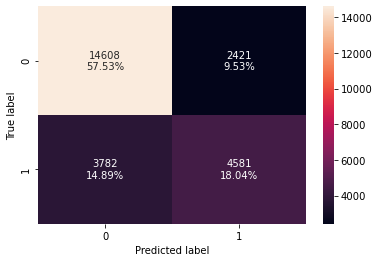

<IPython.core.display.Javascript object>

In [97]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train8, y_train)

In [98]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train8, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy   Recall  Precision       F1
0   0.75571  0.54777   0.654242  0.59629

<IPython.core.display.Javascript object>

## ROC-AUC
* ROC-AUC on training set

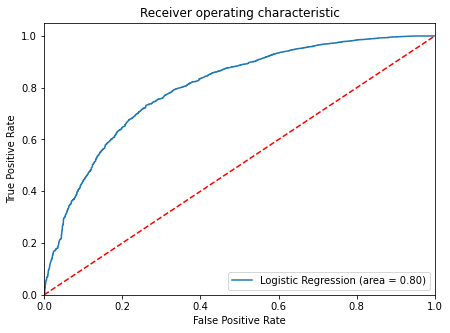

<IPython.core.display.Javascript object>

In [99]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train8))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train8))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.
## Model Performance Improvement
* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.
## Optimal threshold using AUC-ROC curve

In [100]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train8))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3670703502736609


<IPython.core.display.Javascript object>

## Checking model performance on training set

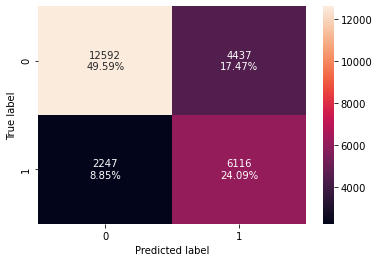

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train8, y_train, threshold=optimal_threshold_auc_roc
)

In [102]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train8, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.736767  0.731317   0.579551  0.646648

<IPython.core.display.Javascript object>

* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

## Let's use Precision-Recall curve and see if we can find a better threshold

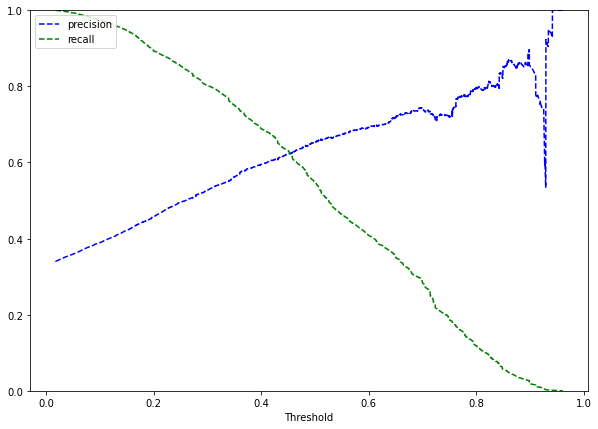

<IPython.core.display.Javascript object>

In [103]:
y_scores = lg1.predict(X_train8)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.48, we get balanced recall and precision.


In [104]:
# setting the threshold
optimal_threshold_curve = 0.48

<IPython.core.display.Javascript object>

## Checking model performance on training set

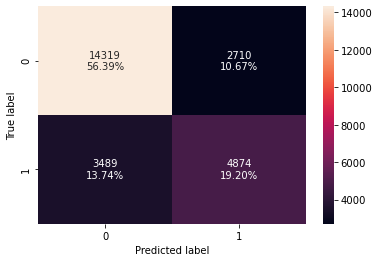

<IPython.core.display.Javascript object>

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train8, y_train, threshold=optimal_threshold_curve)

In [106]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train8, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.755868  0.582805   0.642669  0.611275

<IPython.core.display.Javascript object>

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.48 as the optimal threshold.

## Model Performance Summary

In [107]:
# training performance comparison

models_train_comp_data = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_data.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_data

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.76 Threshold  \
Accuracy                      0.755710                            0.736767   
Recall                        0.547770                            0.731317   
Precision                     0.654242                            0.579551   
F1                            0.596290                            0.646648   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.755868  
Recall                               0.582805  
Precision                            0.642669  
F1                                   0.611275

<IPython.core.display.Javascript object>

## Let's check the performance on the test set

In [108]:
# fitting logistic regression model
logit = sm.Logit(y_test, X_test7.astype(float))
lg = logit.fit(disp=False)
# setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                10883
Model:                          Logit   Df Residuals:                    10867
Method:                           MLE   Df Model:                           15
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2133
Time:                        03:42:01   Log-Likelihood:                -5390.2
converged:                       True   LL-Null:                       -6851.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.1476      0.066      2.253      0.024       0.019       0.276
no_of_week_nights                       -0.0464      

<IPython.core.display.Javascript object>

In [109]:
print("Test performance:")
model_performance_classification_statsmodels(lg, X_test7, y_test)

Test performance:


Accuracy    Recall  Precision        F1
0  0.756593  0.532368   0.651721  0.586029

<IPython.core.display.Javascript object>

In [110]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_test7.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_test_aux = X_test7[cols]

    # fitting the model
    model = sm.Logit(y_test, X_test_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_special_requests', 'room_cost_cat_Moderate', 'room_cost_cat_Premium', 'lead_time_bins_Moderate', 'lead_time_bins_High', 'lead_time_bins_Extreme']


<IPython.core.display.Javascript object>

In [111]:
X_test8 = X_test7[selected_features]
logit1 = sm.Logit(y_test, X_test8.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                10883
Model:                          Logit   Df Residuals:                    10869
Method:                           MLE   Df Model:                           13
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2131
Time:                        03:42:01   Log-Likelihood:                -5391.3
converged:                       True   LL-Null:                       -6851.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
no_of_children                 0.1478      0.066      2.255      0.024       0.019       0.276
no_of_week_nights             -0.0464      0.016     -2.814      0.005      -0.079 

<IPython.core.display.Javascript object>

## Using model with default threshold


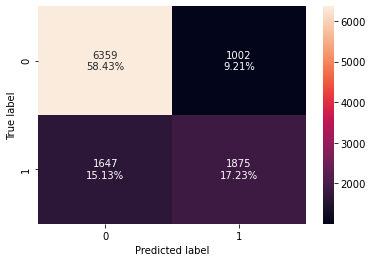

<IPython.core.display.Javascript object>

In [112]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test8, y_test)

In [113]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test8, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.756593  0.532368   0.651721  0.586029

<IPython.core.display.Javascript object>

## ROC curve on test set

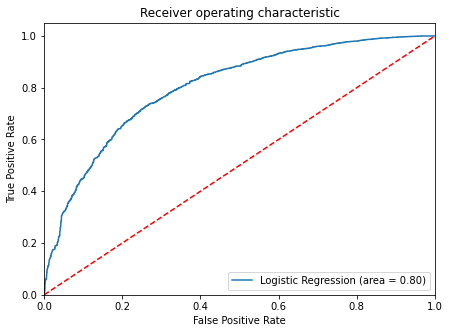

<IPython.core.display.Javascript object>

In [114]:
logit_roc_auc_test = roc_auc_score(y_test, lg1.predict(X_test8))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test8))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.76** 

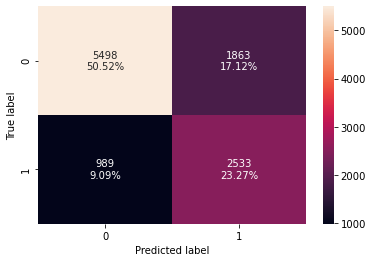

<IPython.core.display.Javascript object>

In [115]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test8, y_test, threshold=optimal_threshold_auc_roc)

In [116]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test8, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0   0.73794  0.719194   0.576206  0.639808

<IPython.core.display.Javascript object>

**Using model with threshold = 0.58**

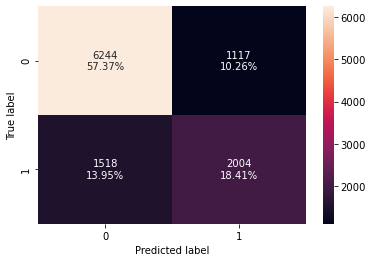

<IPython.core.display.Javascript object>

In [117]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test8, y_test, threshold=optimal_threshold_curve)

In [118]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test8, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.757879  0.568995   0.642102  0.603342

<IPython.core.display.Javascript object>

## Model performance summary

In [119]:
# training performance comparison

models_train_comp_data = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_data.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_data

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.76 Threshold  \
Accuracy                      0.755710                            0.736767   
Recall                        0.547770                            0.731317   
Precision                     0.654242                            0.579551   
F1                            0.596290                            0.646648   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.755868  
Recall                               0.582805  
Precision                            0.642669  
F1                                   0.611275

<IPython.core.display.Javascript object>

In [120]:
# testing performance comparison

models_test_comp_data = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_data.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_data

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.76 Threshold  \
Accuracy                      0.756593                            0.737940   
Recall                        0.532368                            0.719194   
Precision                     0.651721                            0.576206   
F1                            0.586029                            0.639808   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.757879  
Recall                               0.568995  
Precision                            0.642102  
F1                                   0.603342

<IPython.core.display.Javascript object>

## Model Training

## Model performance evaluation


### Model can make wrong predictions as:

1. Predicting that the guest did Not Cancel the booking but in reality the guest Canceled the booking.

2. Predicting that the guest Canceled the booking but in reality the guest did Not Cancel the booking.

### Which case is more important? 

* If we predict that the guest did Not Cancel the booking but in reality the guest Canceled the booking then the hotel loss revenue because the hotel cannot resell the room, resulting in reducing the profit margin.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [121]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [122]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

### We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

### In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

### class_weight is a hyperparameter for the decision tree classifier.

In [123]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)


<IPython.core.display.Javascript object>

In [124]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

## Checking model performance on training set

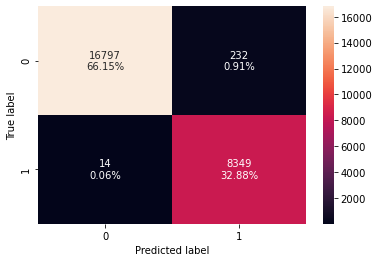

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(model, X_train, y_train)

In [126]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9983259595838814


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.

* 0 errors on the training set, each sample has been classified correctly.

* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

## Checking model performance on test set

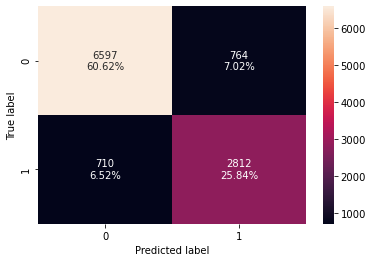

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(model, X_test, y_test)

In [128]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.7984099943214082


<IPython.core.display.Javascript object>

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [129]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

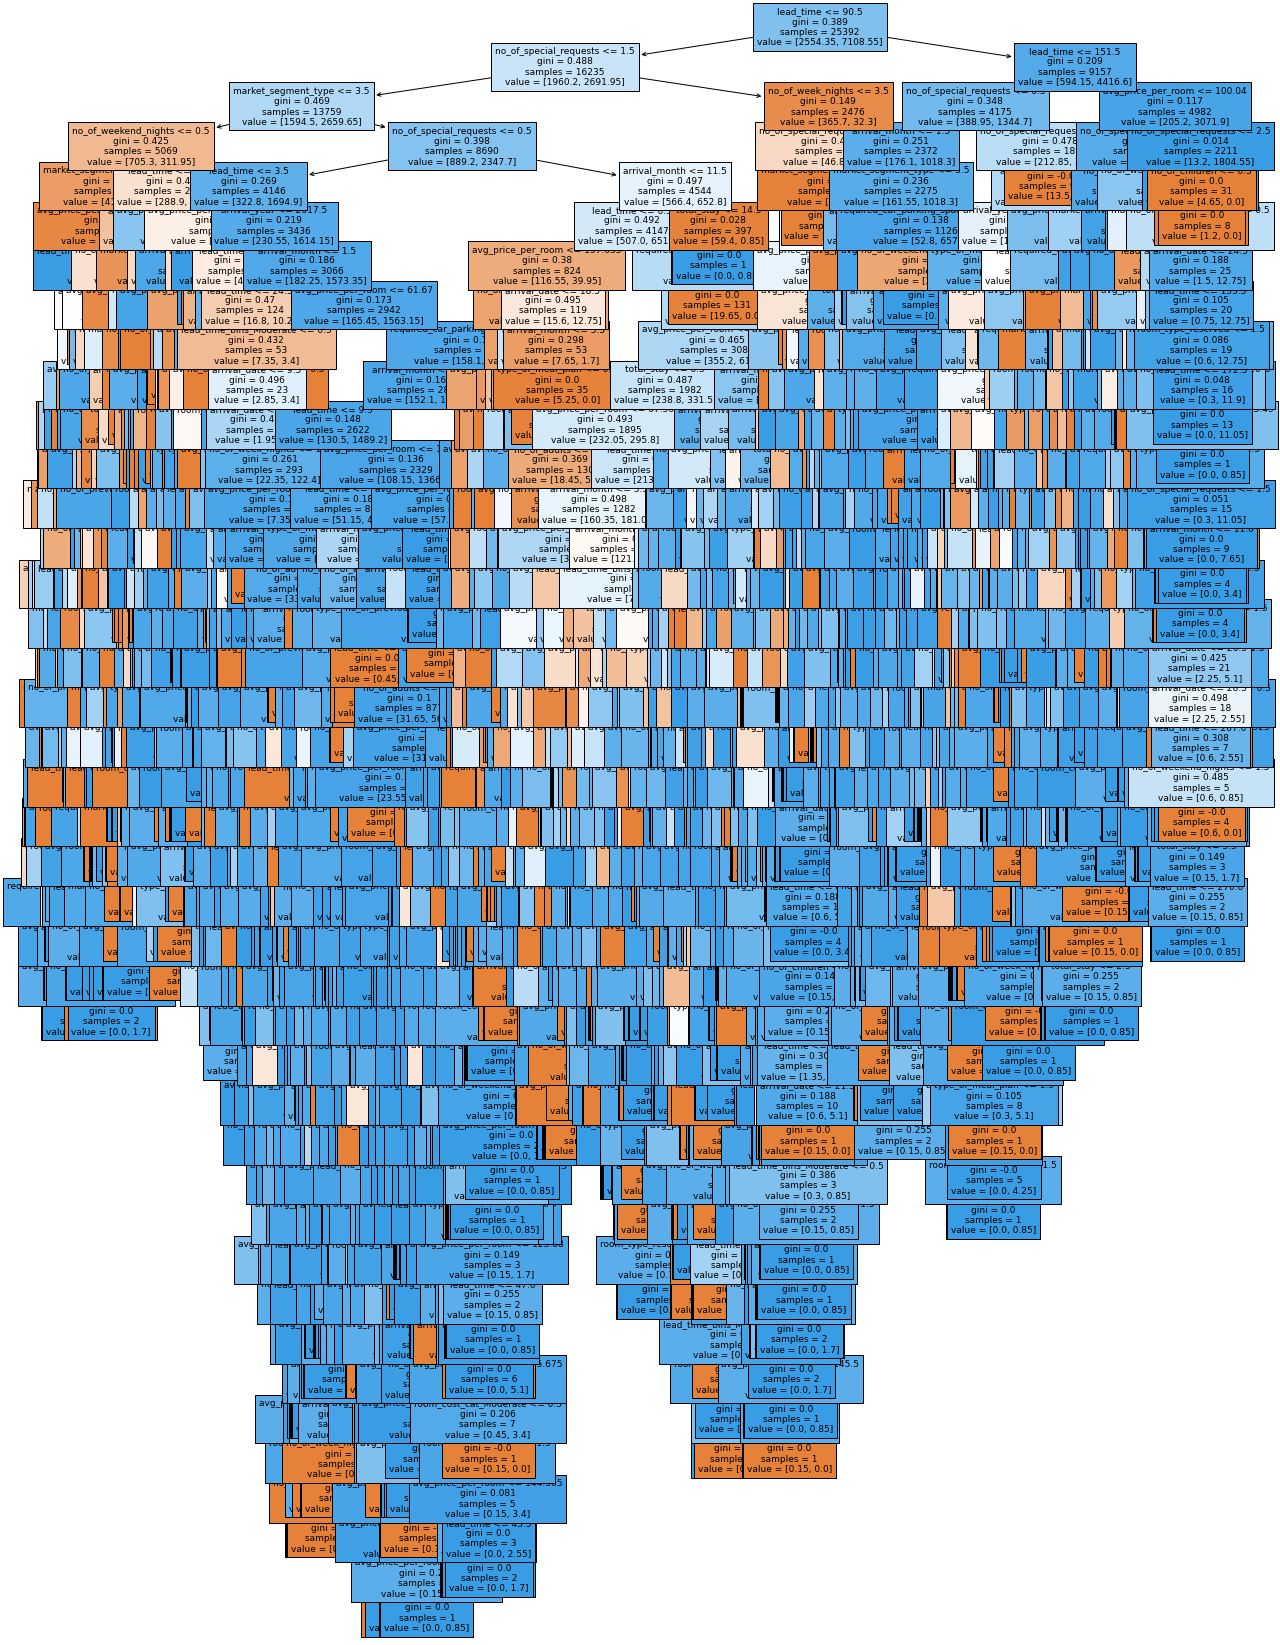

<IPython.core.display.Javascript object>

In [130]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [131]:
## Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- market_segment_type <= 2.50
|   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |--- avg_price_per_room <= 52.50
|   |   |   |   |   |   |   |--- weights: [18.15, 0.00] class: 0
|   |   |   |   |   |   |--- avg_price_per_room >  52.50
|   |   |   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 9.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  9.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_r

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.

In [132]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.284550
no_of_special_requests                0.132515
avg_price_per_room                    0.127550
market_segment_type                   0.101483
arrival_month                         0.085268
arrival_date                          0.084116
total_stay                            0.033915
no_of_week_nights                     0.030165
no_of_weekend_nights                  0.029692
no_of_adults                          0.023457
arrival_year                          0.016306
type_of_meal_plan                     0.010091
room_type_reserved                    0.009914
required_car_parking_space            0.008527
no_of_children                        0.004601
room_cost_cat_Moderate                0.004385
repeated_guest                        0.004323
lead_time_bins_Moderate               0.003534
room_cost_cat_Premium                 0.002937
lead_time_bins_High                   0.000949
no_of_previou

<IPython.core.display.Javascript object>

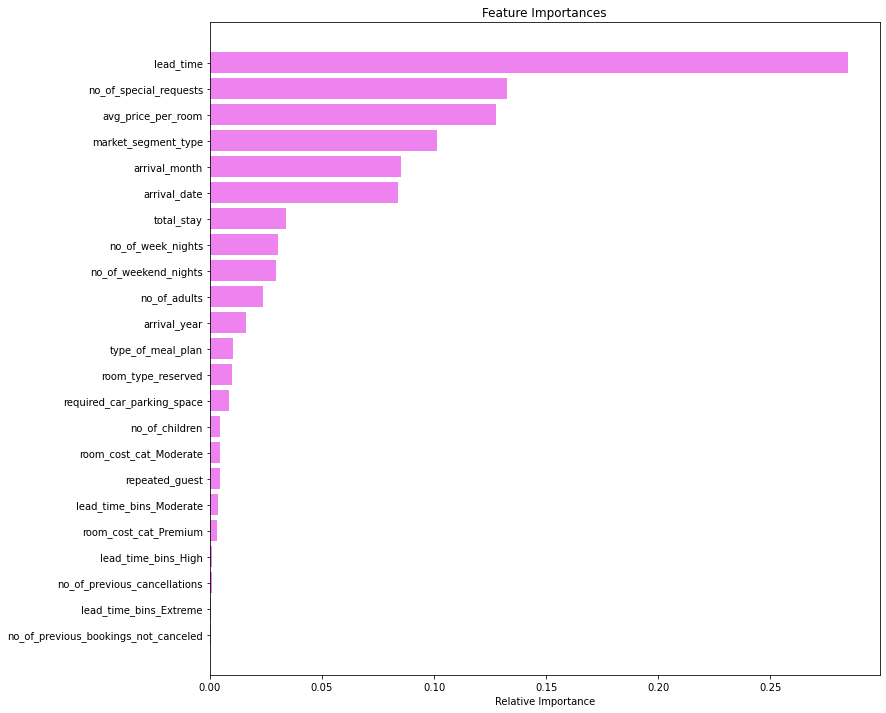

<IPython.core.display.Javascript object>

In [133]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead time is the most important variable for predicting the Revenue.

## Reducing over fitting

* Using GridSearch for Hyperparameter tuning of our tree model
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [134]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

## Checking performance on training set

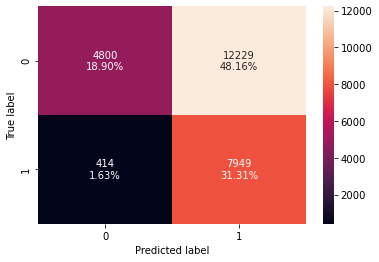

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [136]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9504962334090638


<IPython.core.display.Javascript object>

## Checking performance on test set

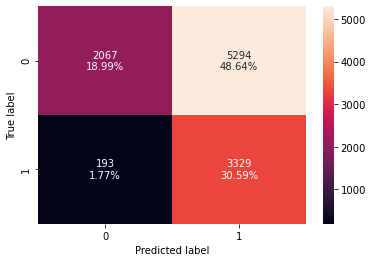

<IPython.core.display.Javascript object>

In [137]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [138]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9452015900056786


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

## Visualizing the Decision Tree

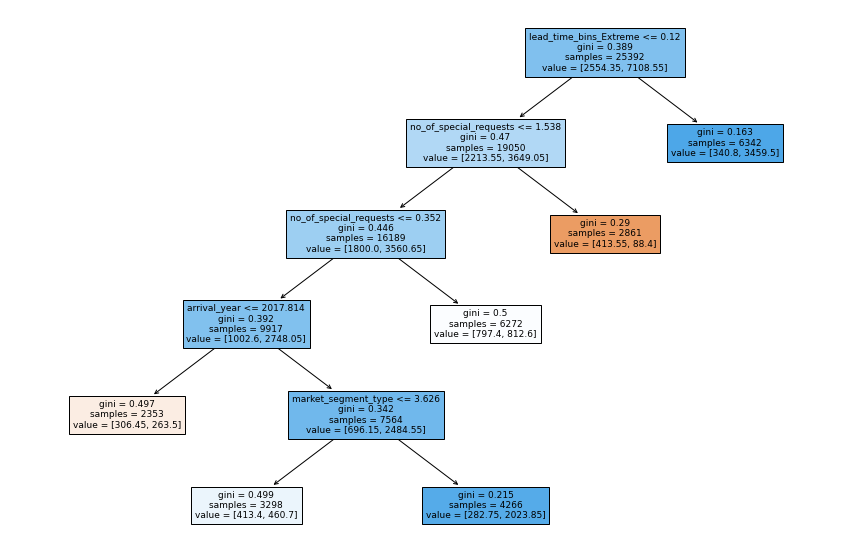

<IPython.core.display.Javascript object>

In [139]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [140]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time_bins_Extreme <= 0.12
|   |--- no_of_special_requests <= 1.54
|   |   |--- no_of_special_requests <= 0.35
|   |   |   |--- arrival_year <= 2017.81
|   |   |   |   |--- weights: [306.45, 263.50] class: 0
|   |   |   |--- arrival_year >  2017.81
|   |   |   |   |--- market_segment_type <= 3.63
|   |   |   |   |   |--- weights: [413.40, 460.70] class: 1
|   |   |   |   |--- market_segment_type >  3.63
|   |   |   |   |   |--- weights: [282.75, 2023.85] class: 1
|   |   |--- no_of_special_requests >  0.35
|   |   |   |--- weights: [797.40, 812.60] class: 1
|   |--- no_of_special_requests >  1.54
|   |   |--- weights: [413.55, 88.40] class: 0
|--- lead_time_bins_Extreme >  0.12
|   |--- weights: [340.80, 3459.50] class: 1



<IPython.core.display.Javascript object>

## Observations from the tree:

In [141]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time_bins_Extreme                0.393271
no_of_special_requests                0.345502
market_segment_type                   0.160128
arrival_year                          0.101099
no_of_week_nights                     0.000000
no_of_previous_bookings_not_canceled  0.000000
lead_time_bins_High                   0.000000
lead_time_bins_Moderate               0.000000
room_cost_cat_Premium                 0.000000
room_cost_cat_Moderate                0.000000
total_stay                            0.000000
no_of_weekend_nights                  0.000000
avg_price_per_room                    0.000000
no_of_previous_cancellations          0.000000
type_of_meal_plan                     0.000000
repeated_guest                        0.000000
no_of_children                        0.000000
arrival_date                          0.000000
arrival_month                         0.000000
lead_time                             0.000000
room_type_res

<IPython.core.display.Javascript object>

SyntaxError: can't use starred expression here (<ipython-input-142-d955ac29270c>, line 9)

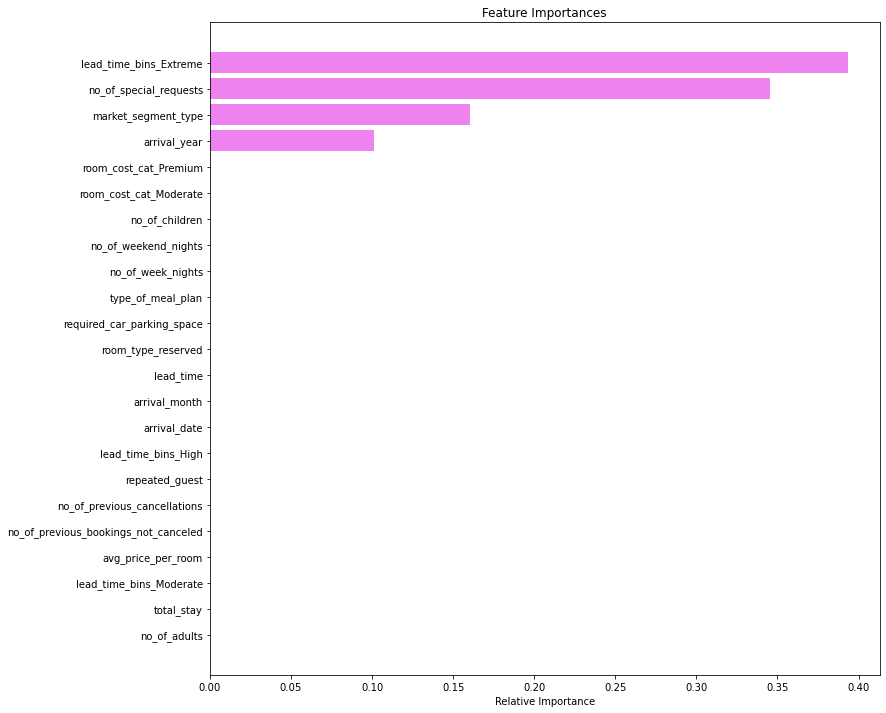

<IPython.core.display.Javascript object>

In [142]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
* plt.show()

* Lead time, no of special requests, market segment and arrival year have high importance.

## Cost Complexity Pruning
* The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

## Total impurity of leaves vs effective alphas of pruned tree
* Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [143]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


<IPython.core.display.Javascript object>

In [144]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.006774
1     1.034059e-20    0.006774
2     1.034059e-20    0.006774
3     1.034059e-20    0.006774
4     1.034059e-20    0.006774
...            ...         ...
1885  5.456394e-03    0.272057
1886  6.138880e-03    0.278196
1887  1.459269e-02    0.292789
1888  2.518565e-02    0.343160
1889  4.577428e-02    0.388934

[1890 rows x 2 columns]

<IPython.core.display.Javascript object>

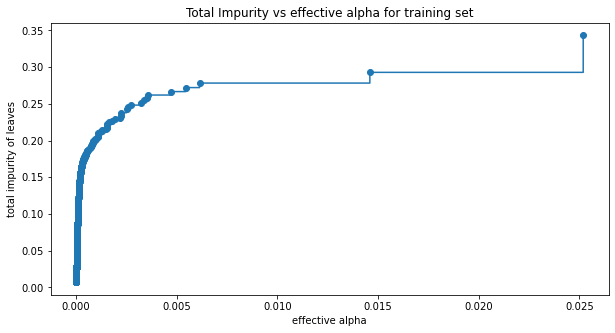

<IPython.core.display.Javascript object>

In [145]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [146]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04577428273917339


<IPython.core.display.Javascript object>

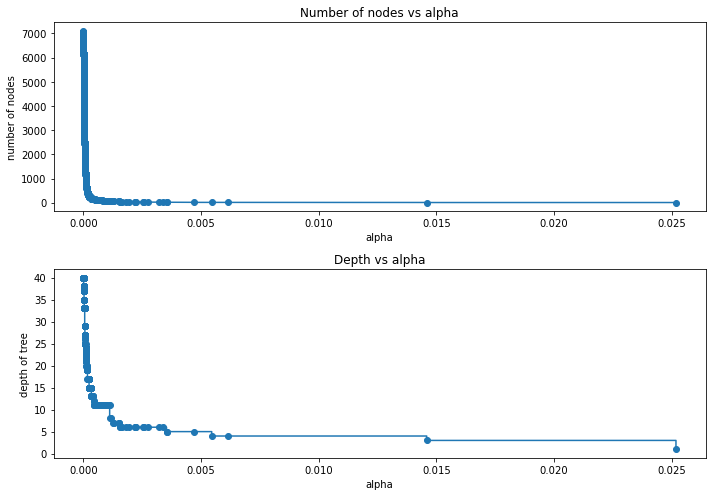

<IPython.core.display.Javascript object>

In [147]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [149]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [150]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)


<IPython.core.display.Javascript object>

In [151]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

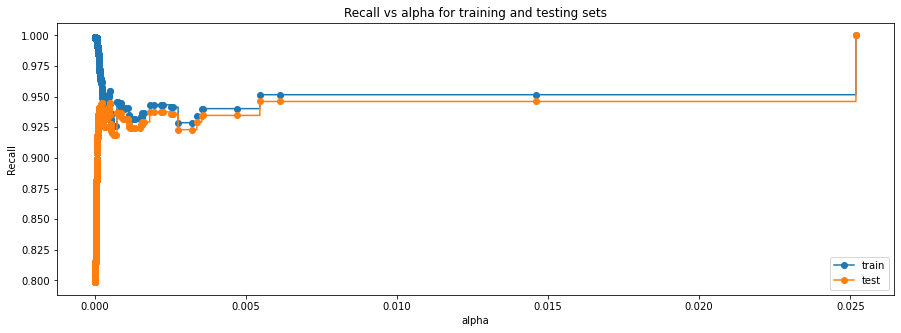

<IPython.core.display.Javascript object>

In [152]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [153]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.025185648755395765,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [154]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.025185648755395765,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

## checking performance on training set

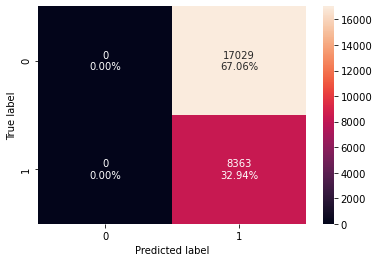

<IPython.core.display.Javascript object>

In [155]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [156]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


<IPython.core.display.Javascript object>

## checking performance on test set

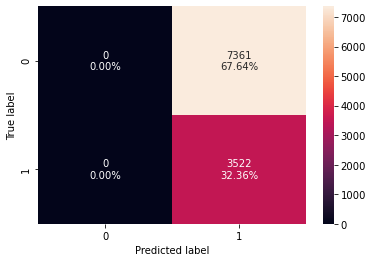

<IPython.core.display.Javascript object>

In [157]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [158]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 1.0


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

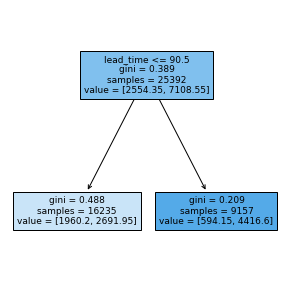

<IPython.core.display.Javascript object>

In [159]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.002 ccp_alpha**

In [160]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

## Checking performance on the training set

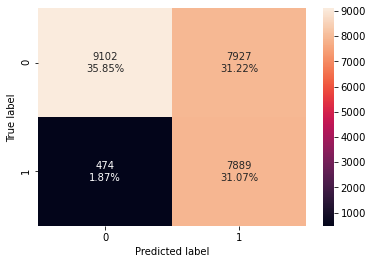

<IPython.core.display.Javascript object>

In [161]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [162]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.943321774482841


<IPython.core.display.Javascript object>

## Checking performance on the test set

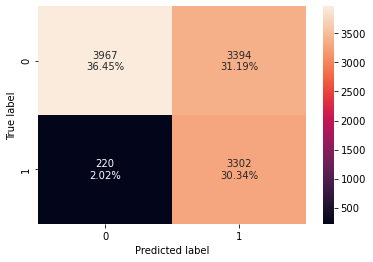

<IPython.core.display.Javascript object>

In [163]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [164]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9375354911981828


<IPython.core.display.Javascript object>

* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

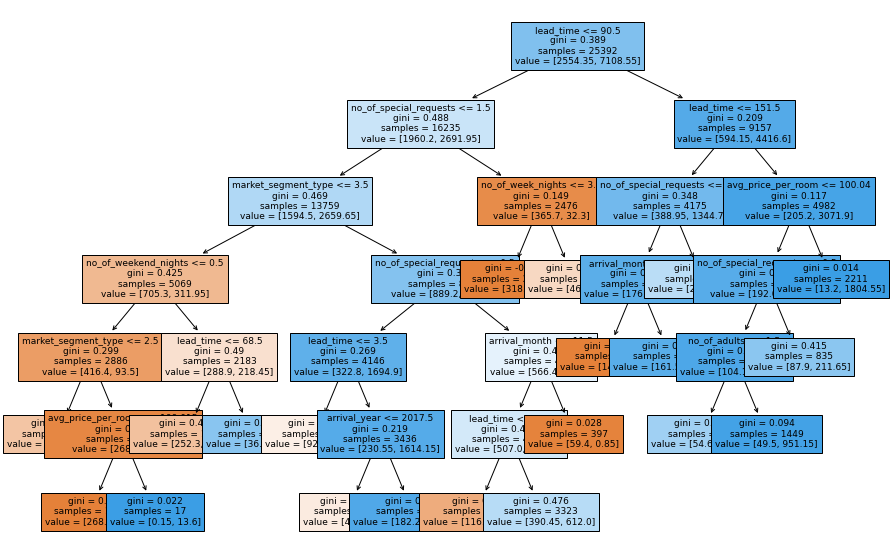

<IPython.core.display.Javascript object>

In [165]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [166]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- market_segment_type <= 2.50
|   |   |   |   |   |--- weights: [147.75, 79.90] class: 0
|   |   |   |   |--- market_segment_type >  2.50
|   |   |   |   |   |--- avg_price_per_room <= 199.01
|   |   |   |   |   |   |--- weights: [268.50, 0.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  199.01
|   |   |   |   |   |   |--- weights: [0.15, 13.60] class: 1
|   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |--- weights: [252.30, 128.35] class: 0
|   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |--- weights: [36.60, 90.10] class: 1
|   |   |--- market_segment_type >  3.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- lead_time <= 3.50
|   |   |   |   |   |--- weights: [92.25, 80.75] class: 0
|   |   |   |   |--- lead_time 

<IPython.core.display.Javascript object>

In [167]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.397849
no_of_special_requests                0.272711
market_segment_type                   0.190418
arrival_month                         0.036133
avg_price_per_room                    0.032733
arrival_year                          0.021070
no_of_weekend_nights                  0.020103
no_of_adults                          0.015312
no_of_week_nights                     0.013671
room_type_reserved                    0.000000
required_car_parking_space            0.000000
arrival_date                          0.000000
no_of_children                        0.000000
repeated_guest                        0.000000
no_of_previous_cancellations          0.000000
no_of_previous_bookings_not_canceled  0.000000
type_of_meal_plan                     0.000000
total_stay                            0.000000
room_cost_cat_Moderate                0.000000
room_cost_cat_Premium                 0.000000
lead_time_bin

<IPython.core.display.Javascript object>

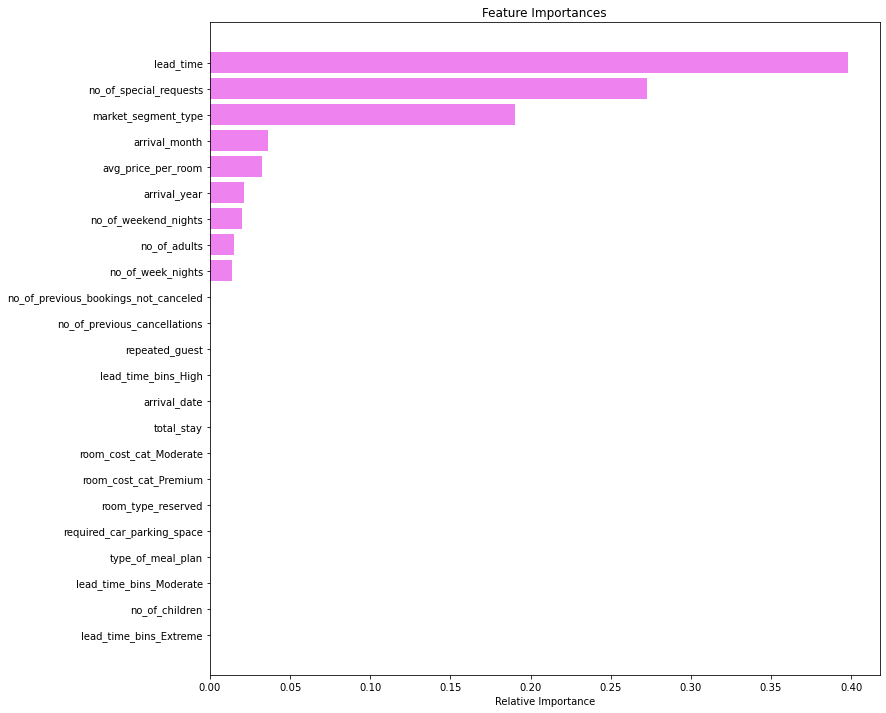

<IPython.core.display.Javascript object>

In [168]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparing all the decision tree models

In [169]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                0.998326
1                0.950496
2                0.943322

<IPython.core.display.Javascript object>

In [170]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.798410
1               0.945202
2               0.937535

<IPython.core.display.Javascript object>

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

##  Conclusions

- We analyzed the "INN Hotel Project" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict what factors make the customer cancel their booking.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Lead time, no of special requests, market segment, arrival month, price of the room and no of adults are the most important variable in predicting the customers that will cancel their booking. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Recommendations
* The busiest months are from August to October, hence promotional offers like free tickets to local tourist spots and vouchers to local restaurants will increase the chances for the customes not to cancel as they are the months of travel in the year.
* Parking spots doesnt seem to affect the cancel however offering bicycles to travel around the city for local tourism will attract a lot of customers not to cancel as it is the best mode of transportation to view a city and also encouraging to awareness to global warming.
* Lead time is the important feature leading to cancellations, hence booking of the hotel must not be allowed with lead time of more than 120 days but if they end up cancelling then a partial refund of the reservation must be introduced.
* Meal plan of 2 and 3 were unpopular and hence can be omitted and have only 2 meal plans.
* Most of the cancellations came from customers who had no special request. Offering those request at no extra cost might make the customers avoid cancellations.
* Most of the customers were in pairs, so it could be couples travelling for leisure or travel or corporate customers travelling for business, offering special promotions to couples with kids will help in increasing the sector of family and hence avoid cancellations.